In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.model_selection import cross_val_score ,StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB  
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score ,  roc_curve ,  roc_auc_score
pd.set_option('display.max_columns', 500)

In [2]:
df=pd.read_csv('TelcoChurn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#convert total charges from object type to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
#check for missing data
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The Dataset shows 11 missing datapoints for Total Charges . Lets further explore this

In [8]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


From the data , All missing values for total charges have a corresponding tenure value of 0 and a churn of No. This doesnt seem logical hence these 11 rows will be dropped

In [9]:
#drop rows with missing data
df.dropna(inplace=True)

In [10]:
#confirm no more missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='Churn', ylabel='count'>

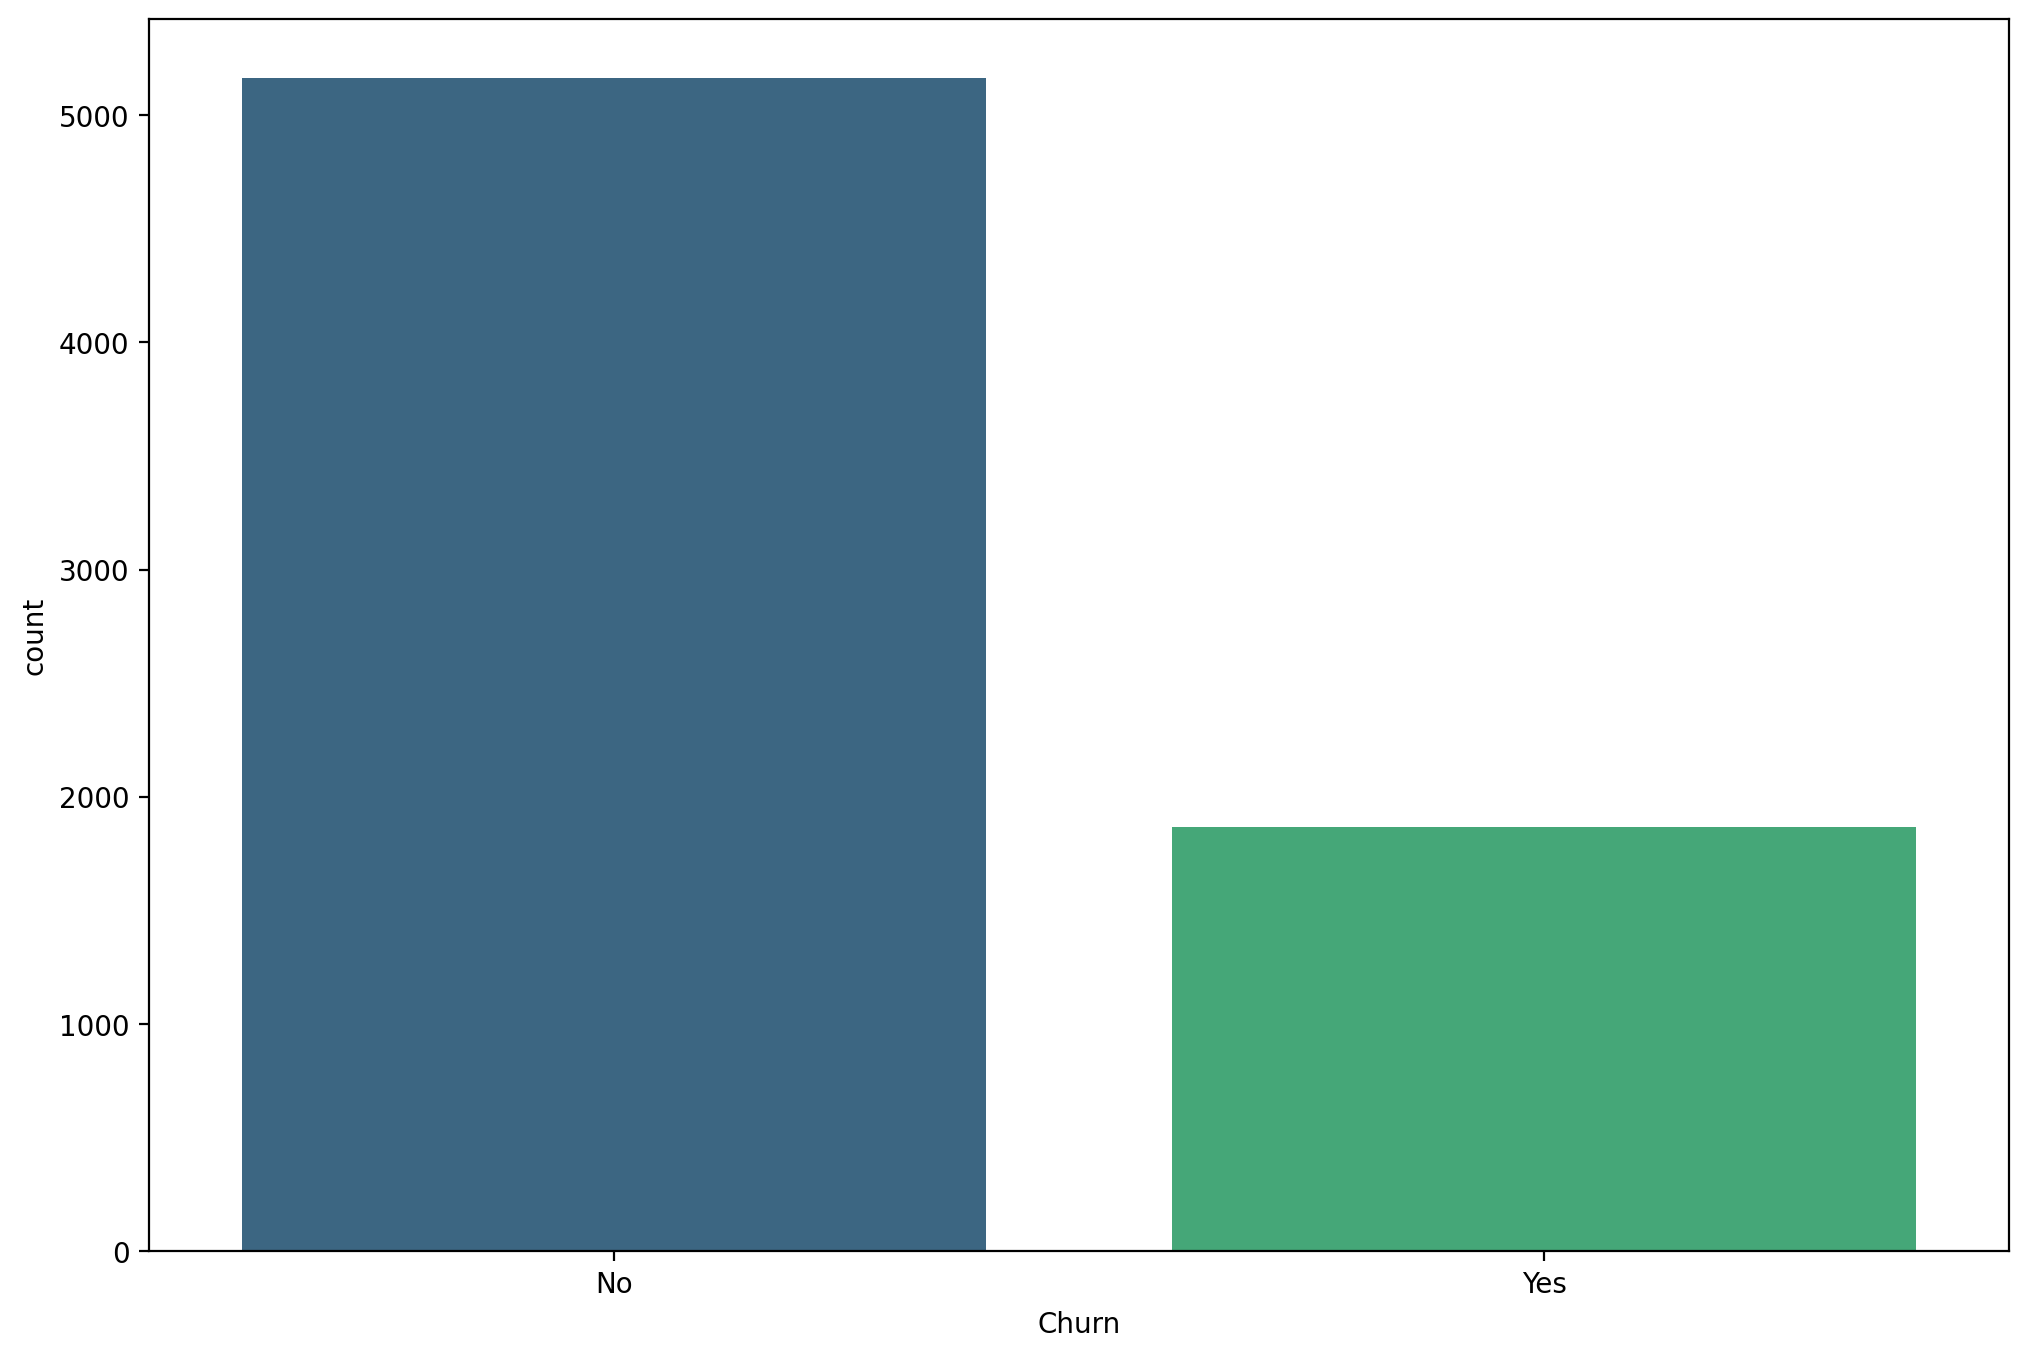

In [11]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='Churn',palette='viridis')

Dataset Imbalanced with majority of people not churning

Text(0.5, 1.0, 'Boxplot of Tenure by Gender and Churn Status')

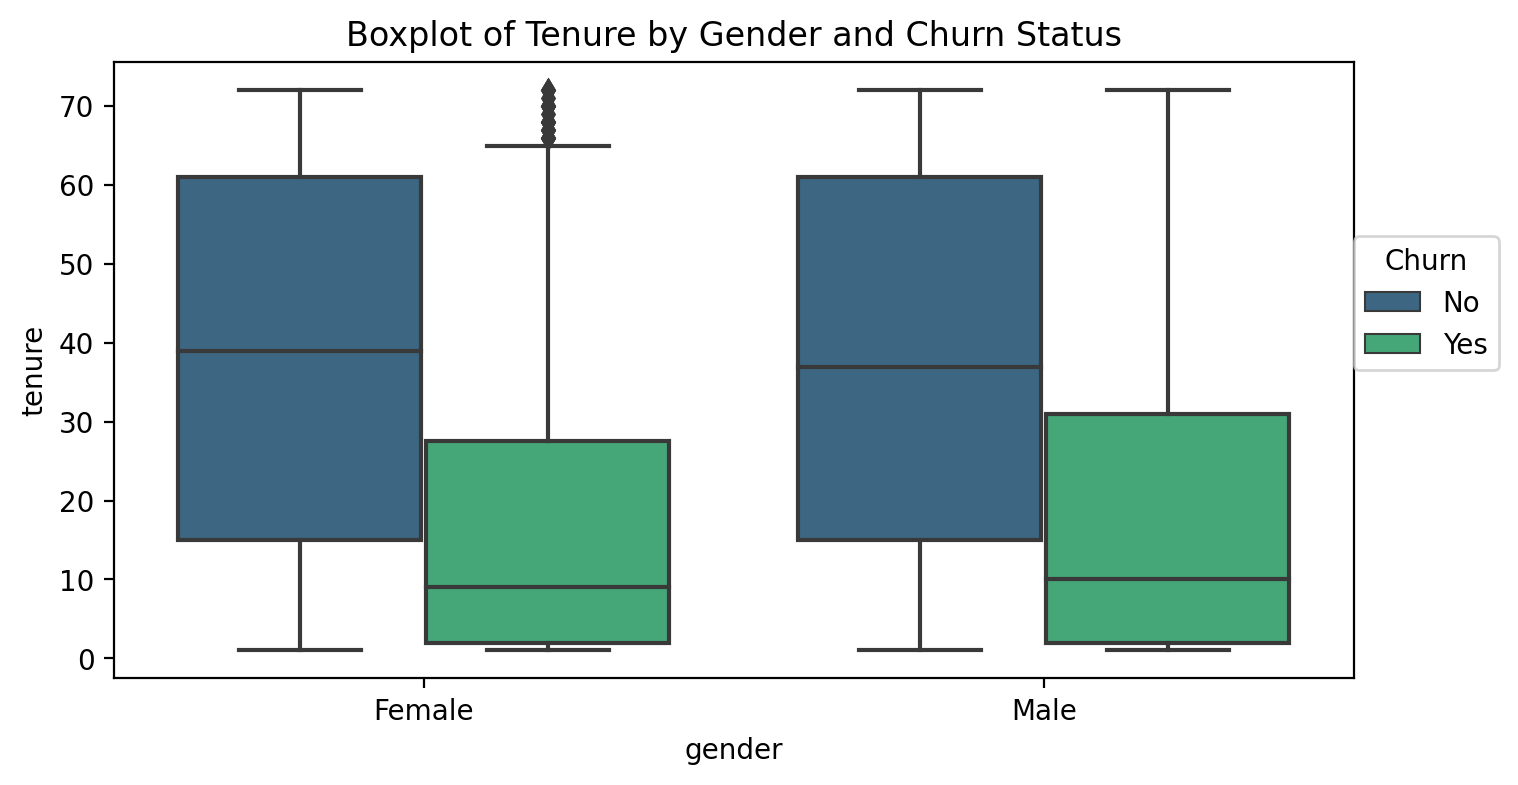

In [12]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(data=df,x='gender',y='tenure',hue='Churn',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")
plt.title("Boxplot of Tenure by Gender and Churn Status")

The Boxplot shows few tenure outliers for Females who Churn. However as this are miniscule i wont be further exploring those outliers. The barplot also shows regardless of gender, people who have a lower tenure period tend to churn more with identical representations for both genders

Text(0.5, 1.0, 'Boxplot of Monthly Charges by Gender and Churn Status')

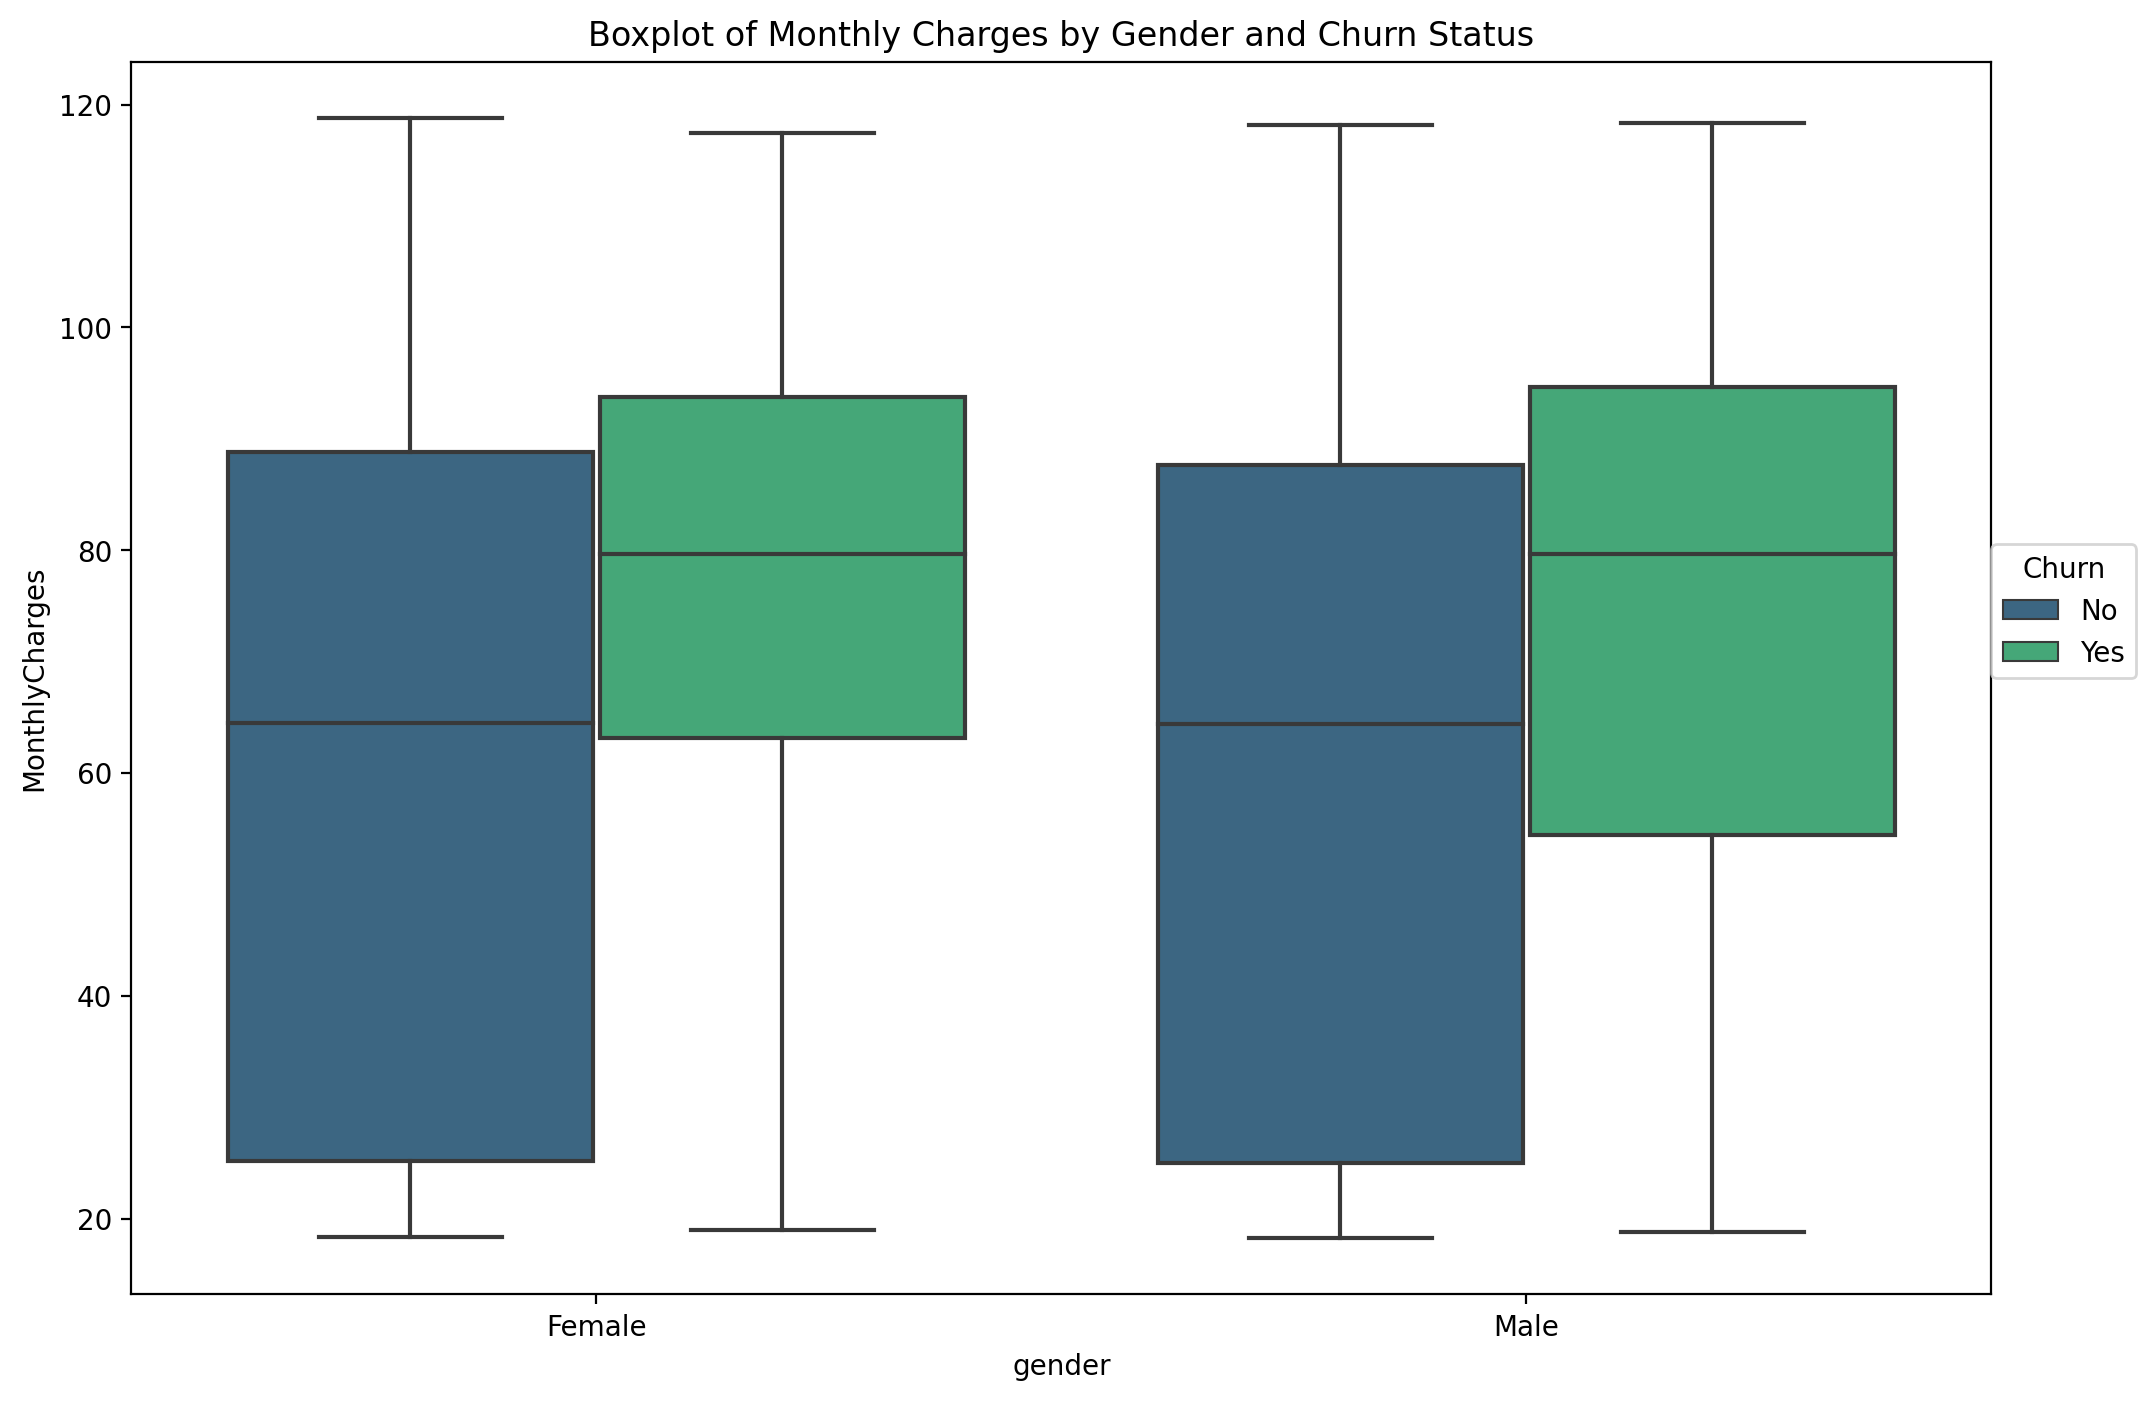

In [13]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(data=df,x='gender', y= 'MonthlyCharges',hue='Churn',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")
plt.title("Boxplot of Monthly Charges by Gender and Churn Status")

The Boxplot shows no outliers for MonthlyCharges and also shows regardless of gender, people who have higher MonthlyCharges tend to churn more with almsot identical representations for both genders

Text(0.5, 1.0, 'Countplot Type of Contract and Churn')

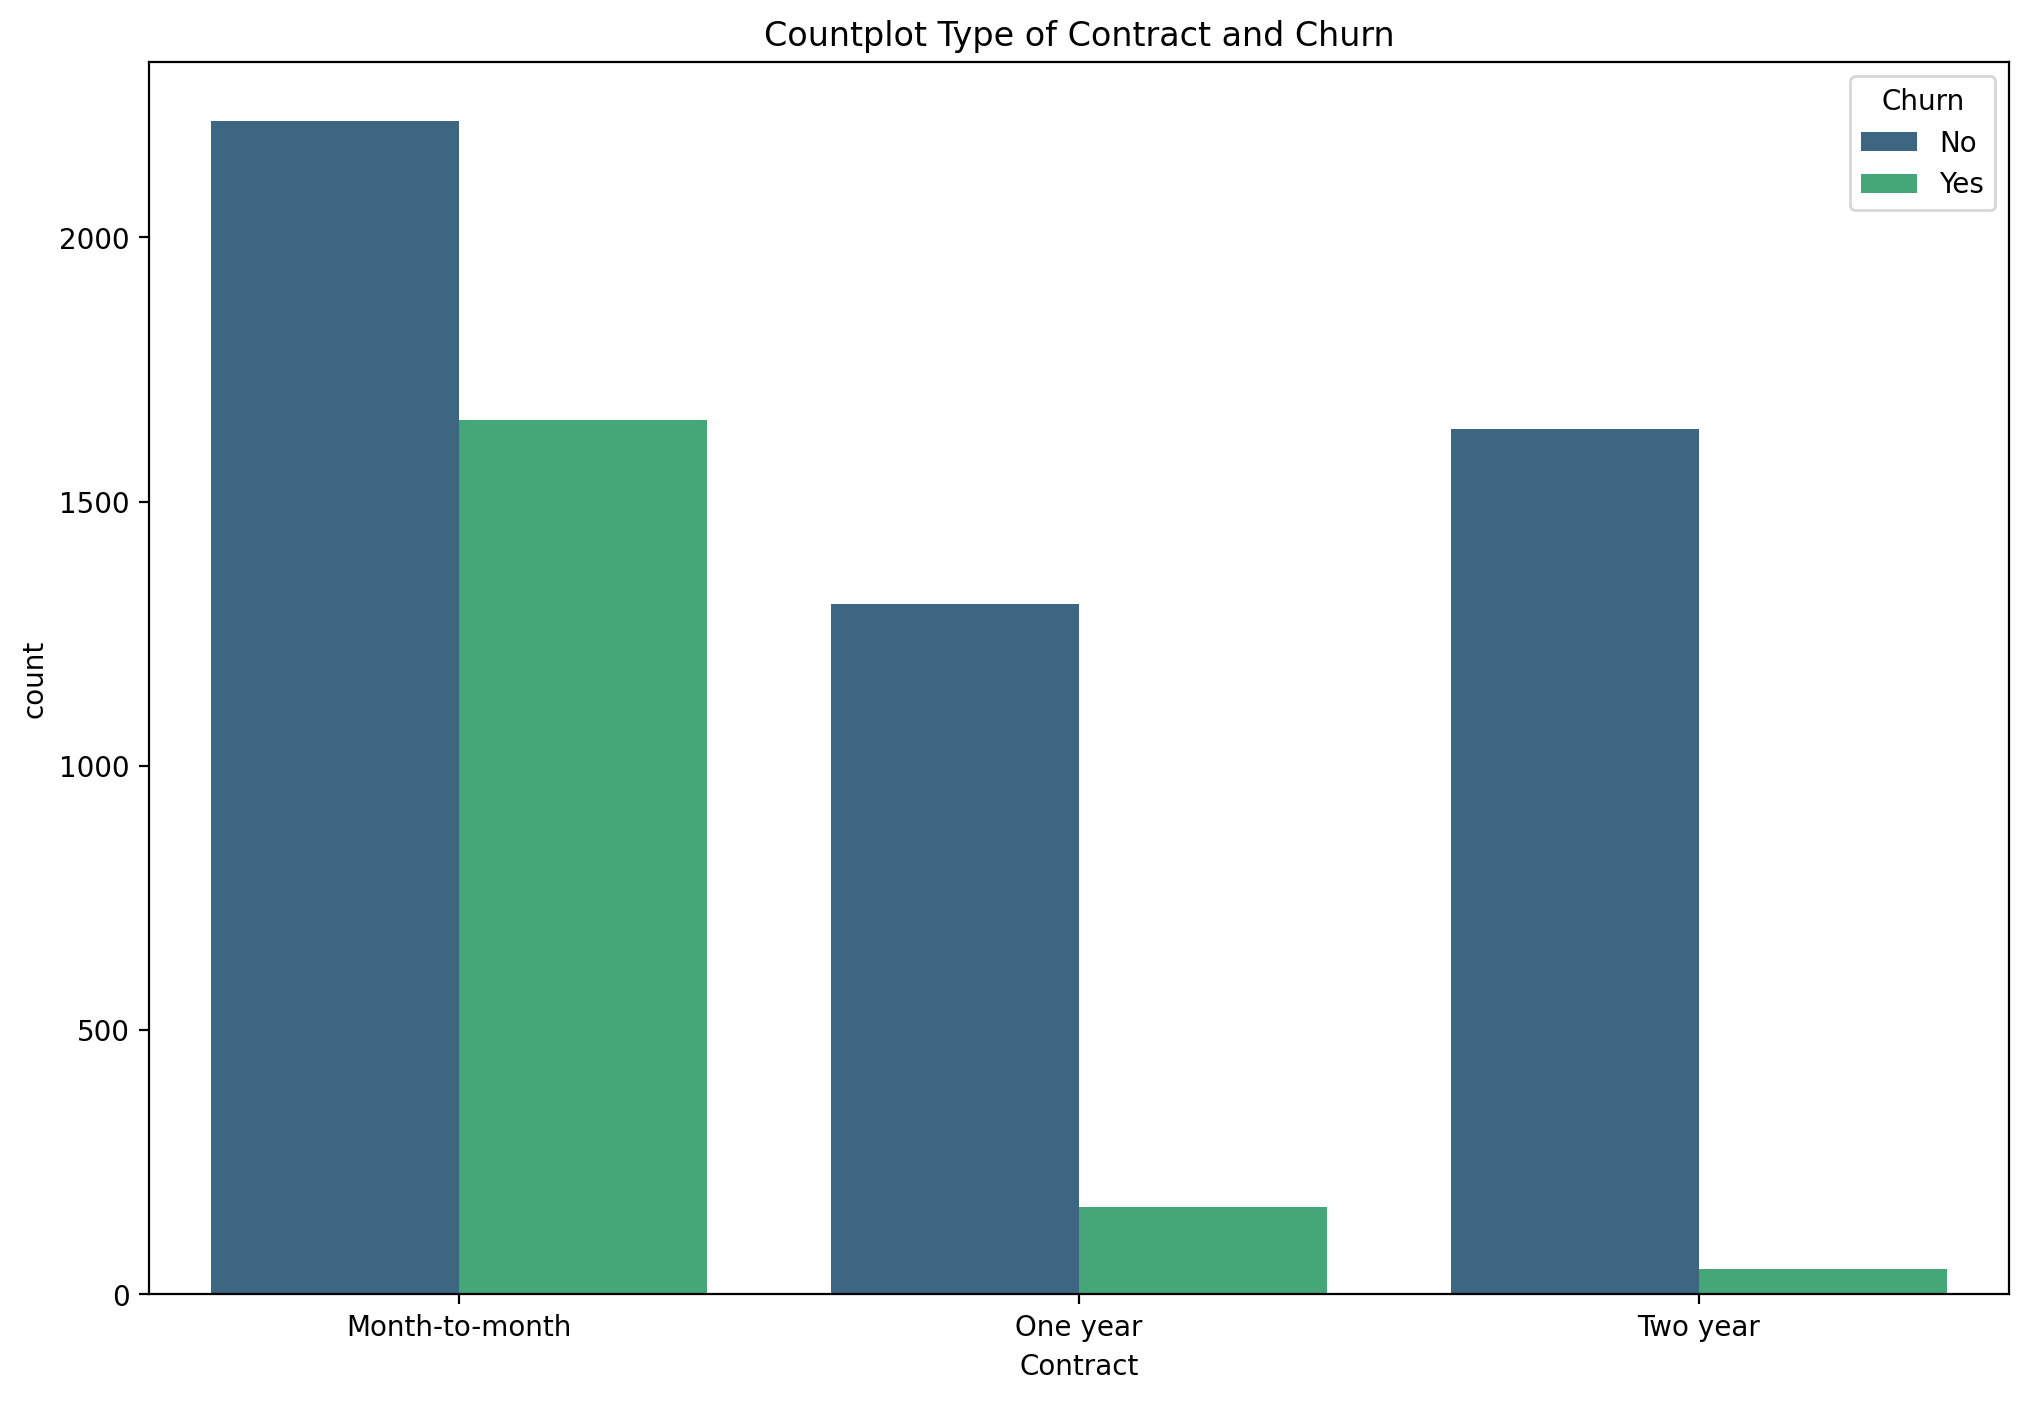

In [14]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='Contract',hue='Churn',palette='viridis')
plt.title("Countplot Type of Contract and Churn")

This plot shows a significant trend where people on Month to Month contracts tend to churn more than any other contract type. It also shows Month to Month contracts are the most popular contract type among customers followed by Two year contrcats with One year contracts being the least popular

Text(0.5, 1.0, 'ScattlerPlot Relationship TotalCharges and Tenure')

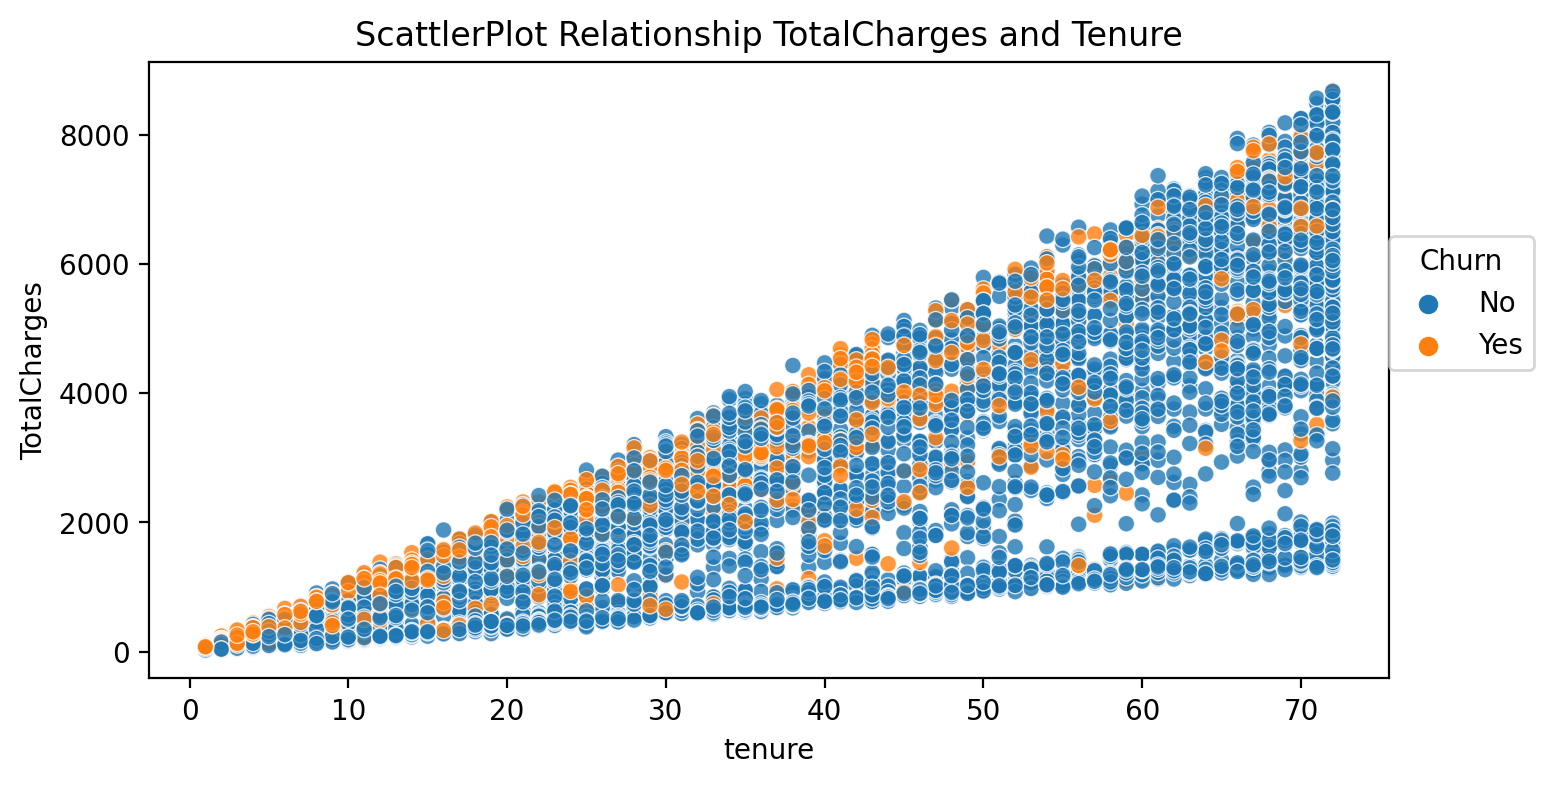

In [15]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=df,x='tenure',y='TotalCharges',hue='Churn',alpha=0.8)
plt.legend(loc=(1,0.5),title = "Churn")
plt.title("ScattlerPlot Relationship TotalCharges and Tenure")

The Scatterplot shows somewhat of a realtionship where as tenure increases customers tend to churn less. This data makes sense in a realsitic world setting as customers who have stay longer with a company are less likely to leave
##### The scatterplot is not completely clear so lets further explore this by creating churn rates in relation to tenure 

In [16]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

<Axes: title={'center': 'Churn Rate Plot'}, xlabel='tenure', ylabel='Rate Customers Churn(%)'>

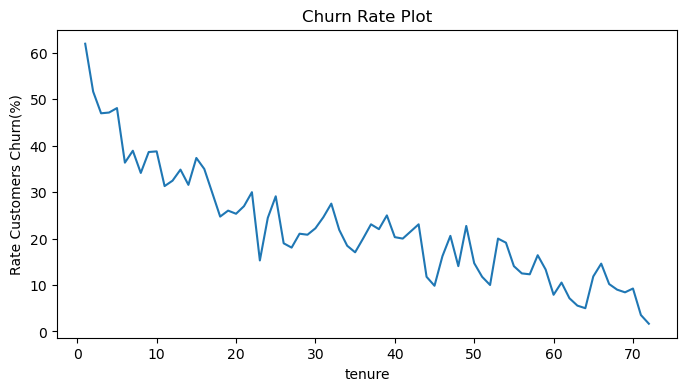

In [17]:
churn_rates_Yes = 100 * yes_churn/(no_churn+yes_churn)
plt.figure(figsize=(8,4),dpi=100)
plt.title("Churn Rate Plot")
plt.ylabel('Rate Customers Churn(%)')
churn_rates_Yes.iloc[0].plot()


I can now safely conclude the initial assumption as true. As seen from the  plot customers who have longer tenure periods definitely tend to churn less

### Plot Coefficient Correlations
 



In [18]:
df_corr  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [19]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

# converting the categorical features
df_dummies = pd.get_dummies(df[categorical_variables])

# adding the numerical features
df_dummies[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

df_dummies['Churn'] = df['Churn']
df_dummies['Churn'] = df_dummies['Churn'].map({'No': 0, 'Yes': 1})
 

<Axes: >

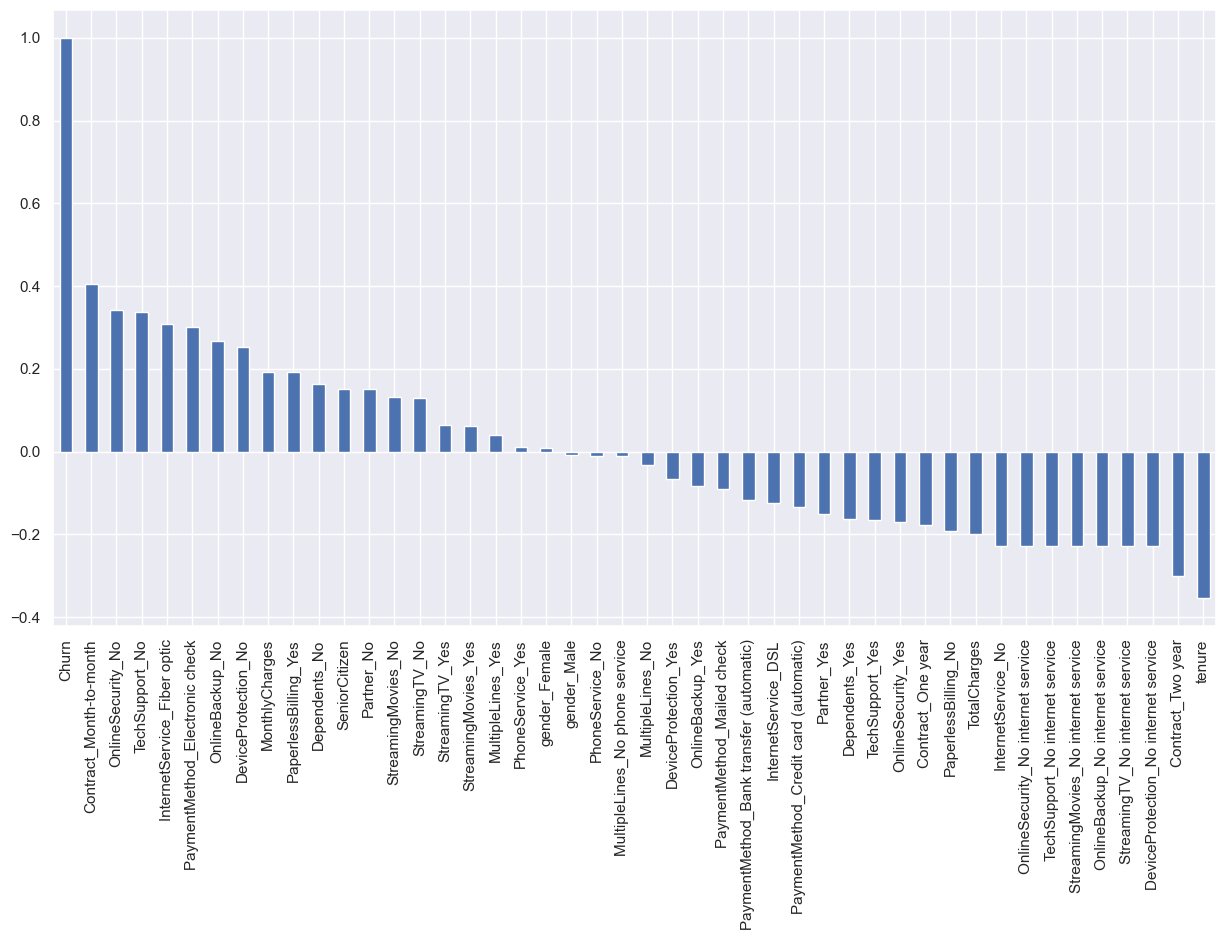

In [20]:
#Get Correlation of "Churn" with other variables:
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

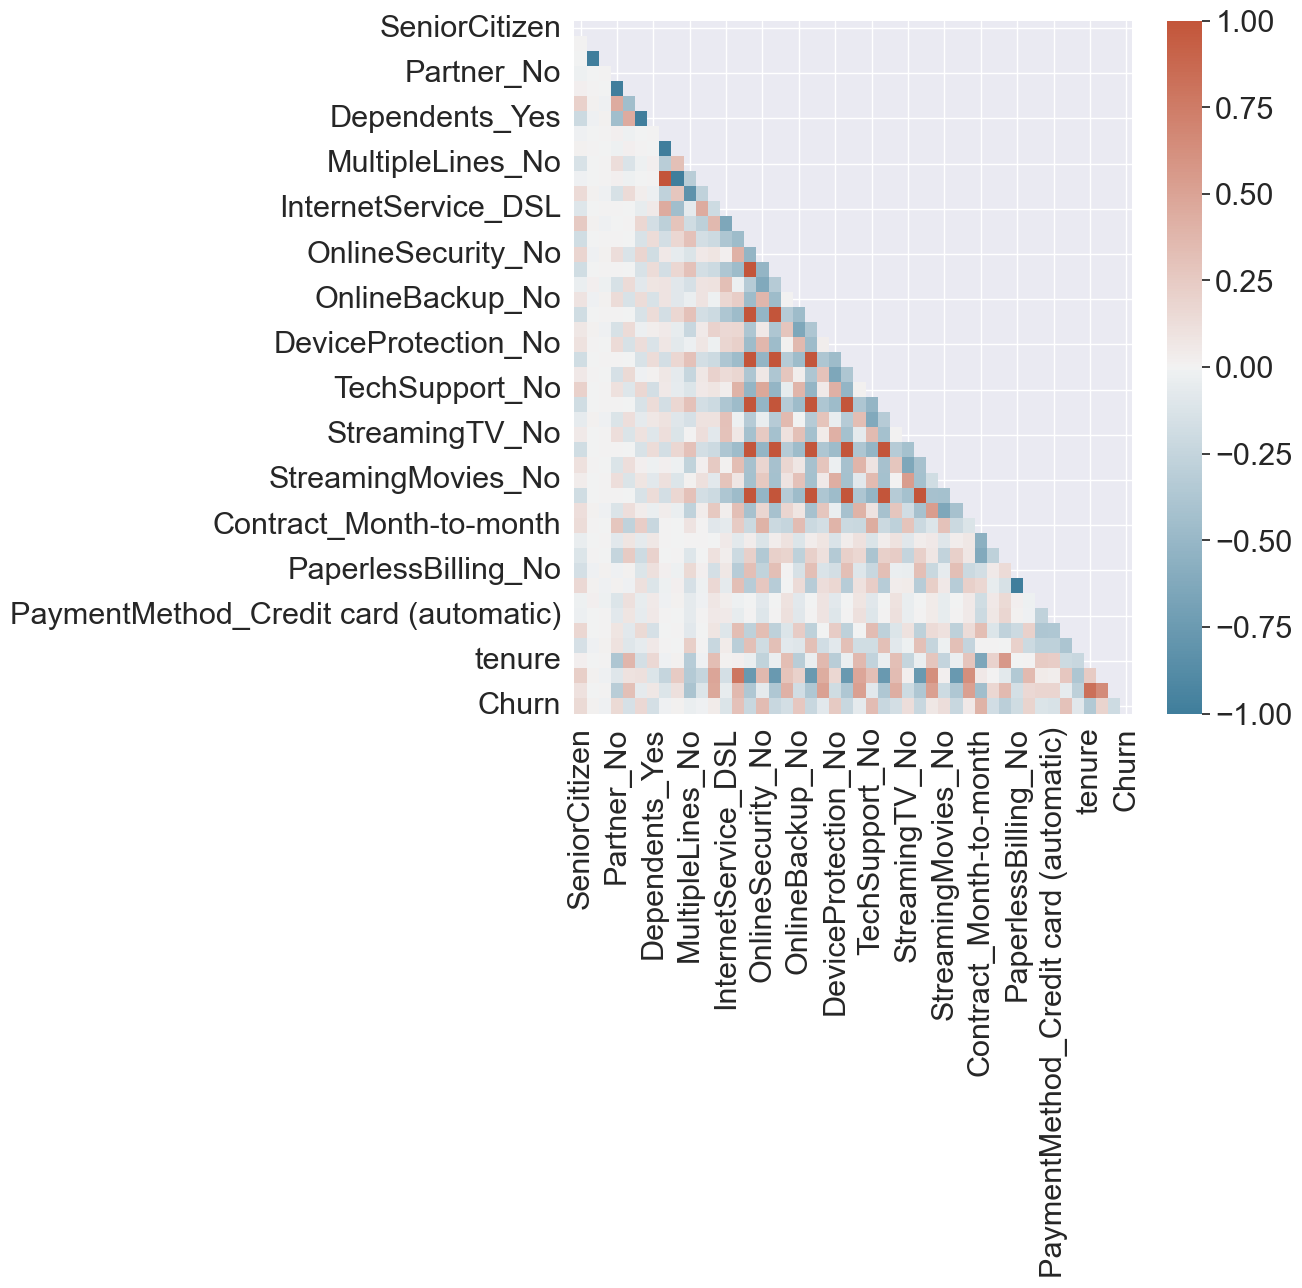

In [21]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(9,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(df_dummies.corr(), dtype=bool))
sns.heatmap(df_dummies.corr(), mask=mask, cmap=cmap)

In [22]:
df_corr['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

<Axes: >

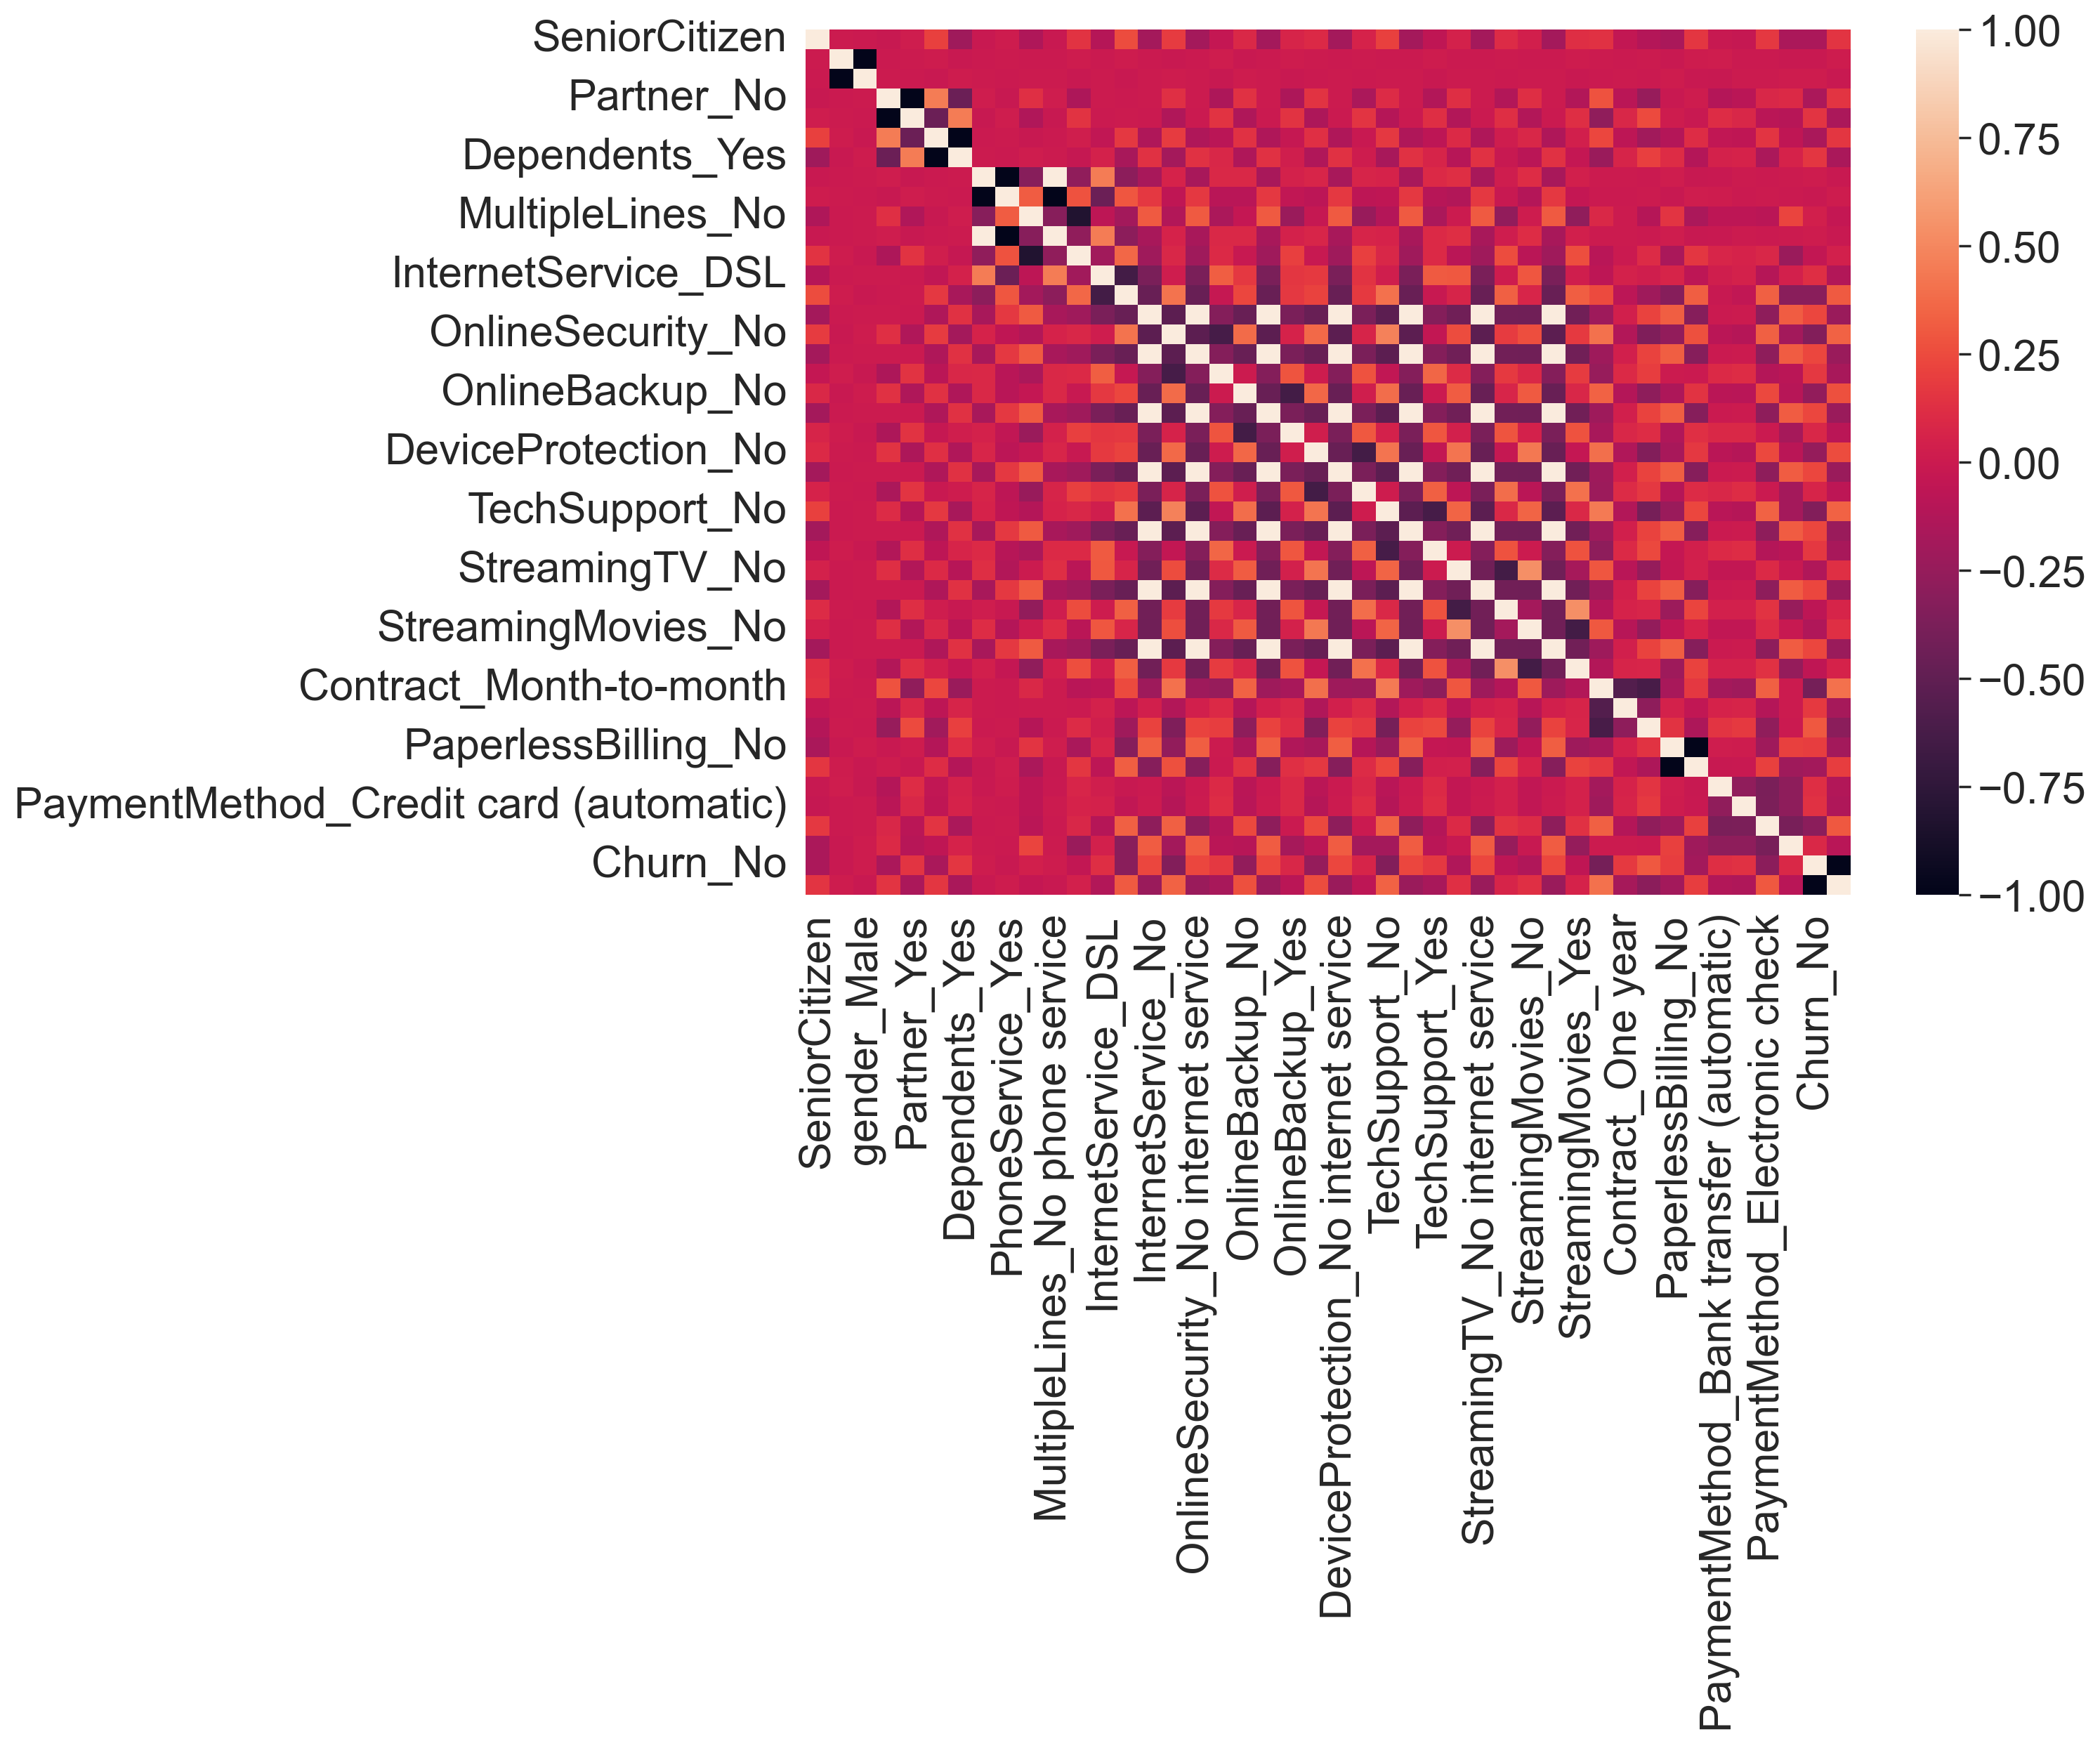

In [23]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df_corr)

## Feature Engineering

#### Seperate out Monthly Charges into different tiers
1. Basic Plan - Monthly Charges lower or equal to 30
2. Advanced Plan - Monthly Charges greater than 30 and up to 60
3. Premium Plan - Monthly Charges greater than 60 and up to 100
4. Executive Plan = Monthly Charges greater than 100

In [24]:
#function to seperate out monthly_charge feature
def Monthly_plans(monthly_charge):
    if monthly_charge <= 30:
        return 'Basic Plan'
    elif monthly_charge >30 and monthly_charge <= 60:
        return 'Advanced Plan'
    elif monthly_charge >60 and monthly_charge <= 100:
        return 'Premium Plan'
    elif monthly_charge >100:
        return 'Executive Plan'
    

In [25]:
#apply fucntion to dataset features
df['PlanType'] = df['MonthlyCharges'].apply(Monthly_plans)

Text(0.5, 1.0, 'CountPlot Relationship MonthlyPlans and Churn')

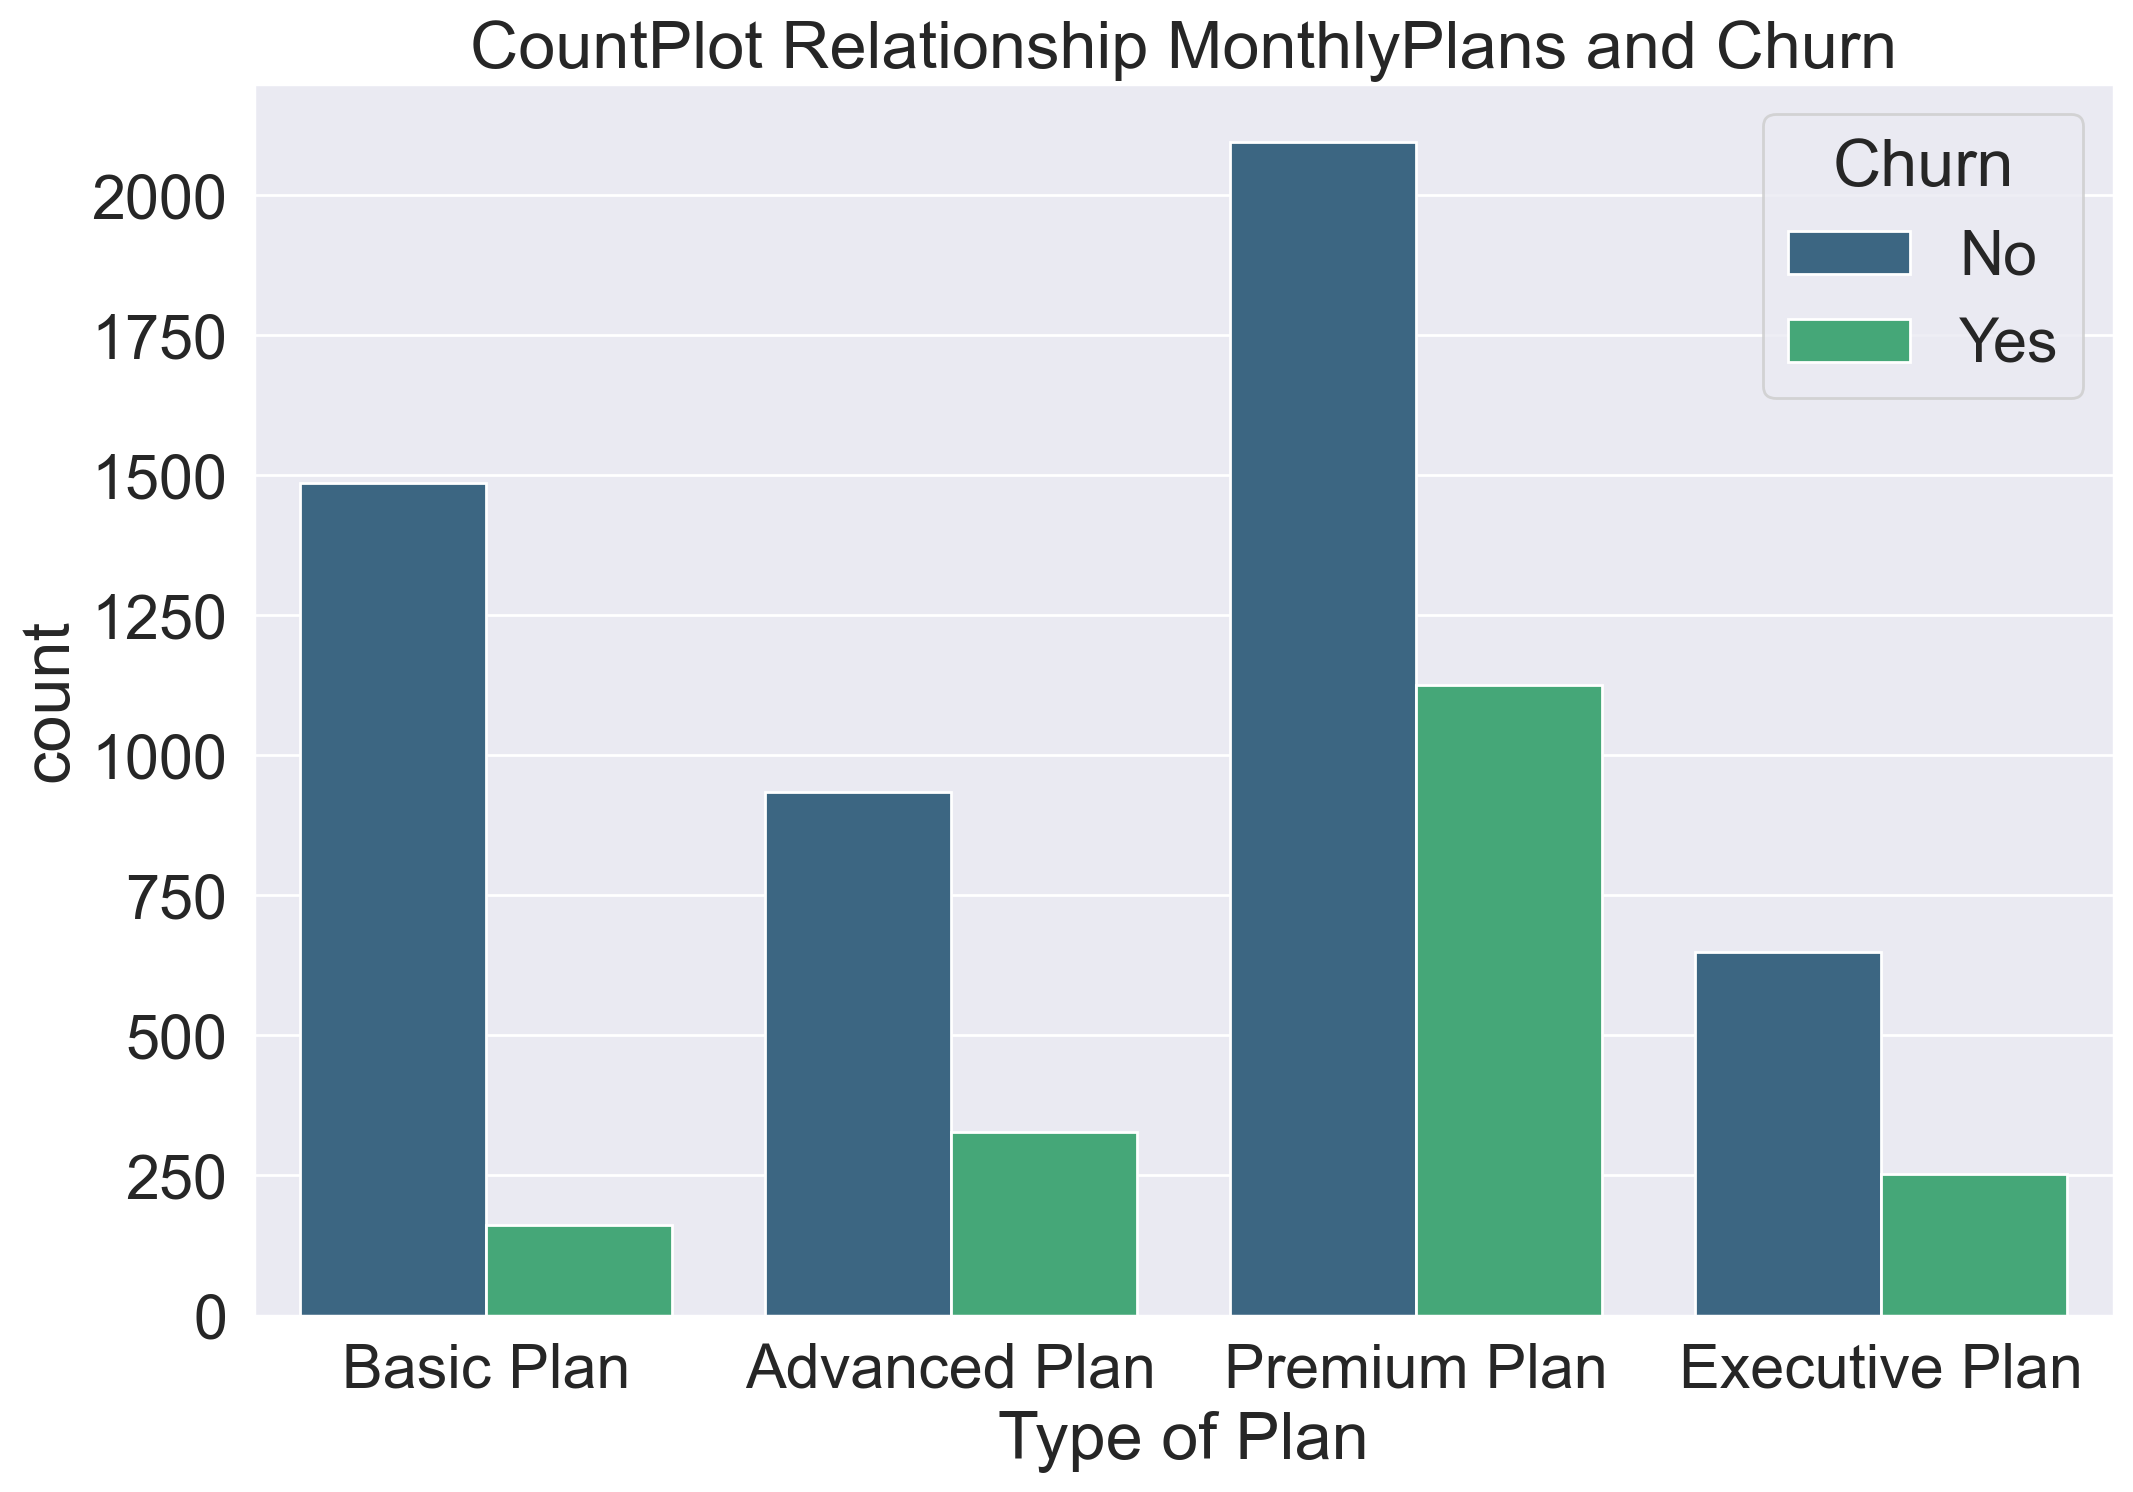

In [26]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='PlanType',hue='Churn',palette='viridis')
plt.xlabel('Type of Plan')
plt.title("CountPlot Relationship MonthlyPlans and Churn")

In [27]:
# Create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['Basic Plan', 'Advanced Plan', 'Premium Plan' ,'Executive Plan']])

df['PlanType'] = ordinal_encoder.fit_transform(df[['PlanType']])

In [28]:
##### Seperate out tenure into different levels
def yearly_tenure(tenure):
    if tenure <= 12:
        return 'level 1'
    elif tenure >12 and tenure <=24:
        return 'level 2'
    elif tenure >24 and tenure <=36:
        return 'level 3'
    elif tenure >36 and tenure <=48:
        return 'level 4'
    elif tenure >48 and tenure <=60:
        return 'level 5'
    elif tenure > 60:
        return 'level 6'
df['tenure_level'] = df['tenure'].apply(yearly_tenure)

Text(0.5, 1.0, 'CountPlot Relationship Tenure and Churn')

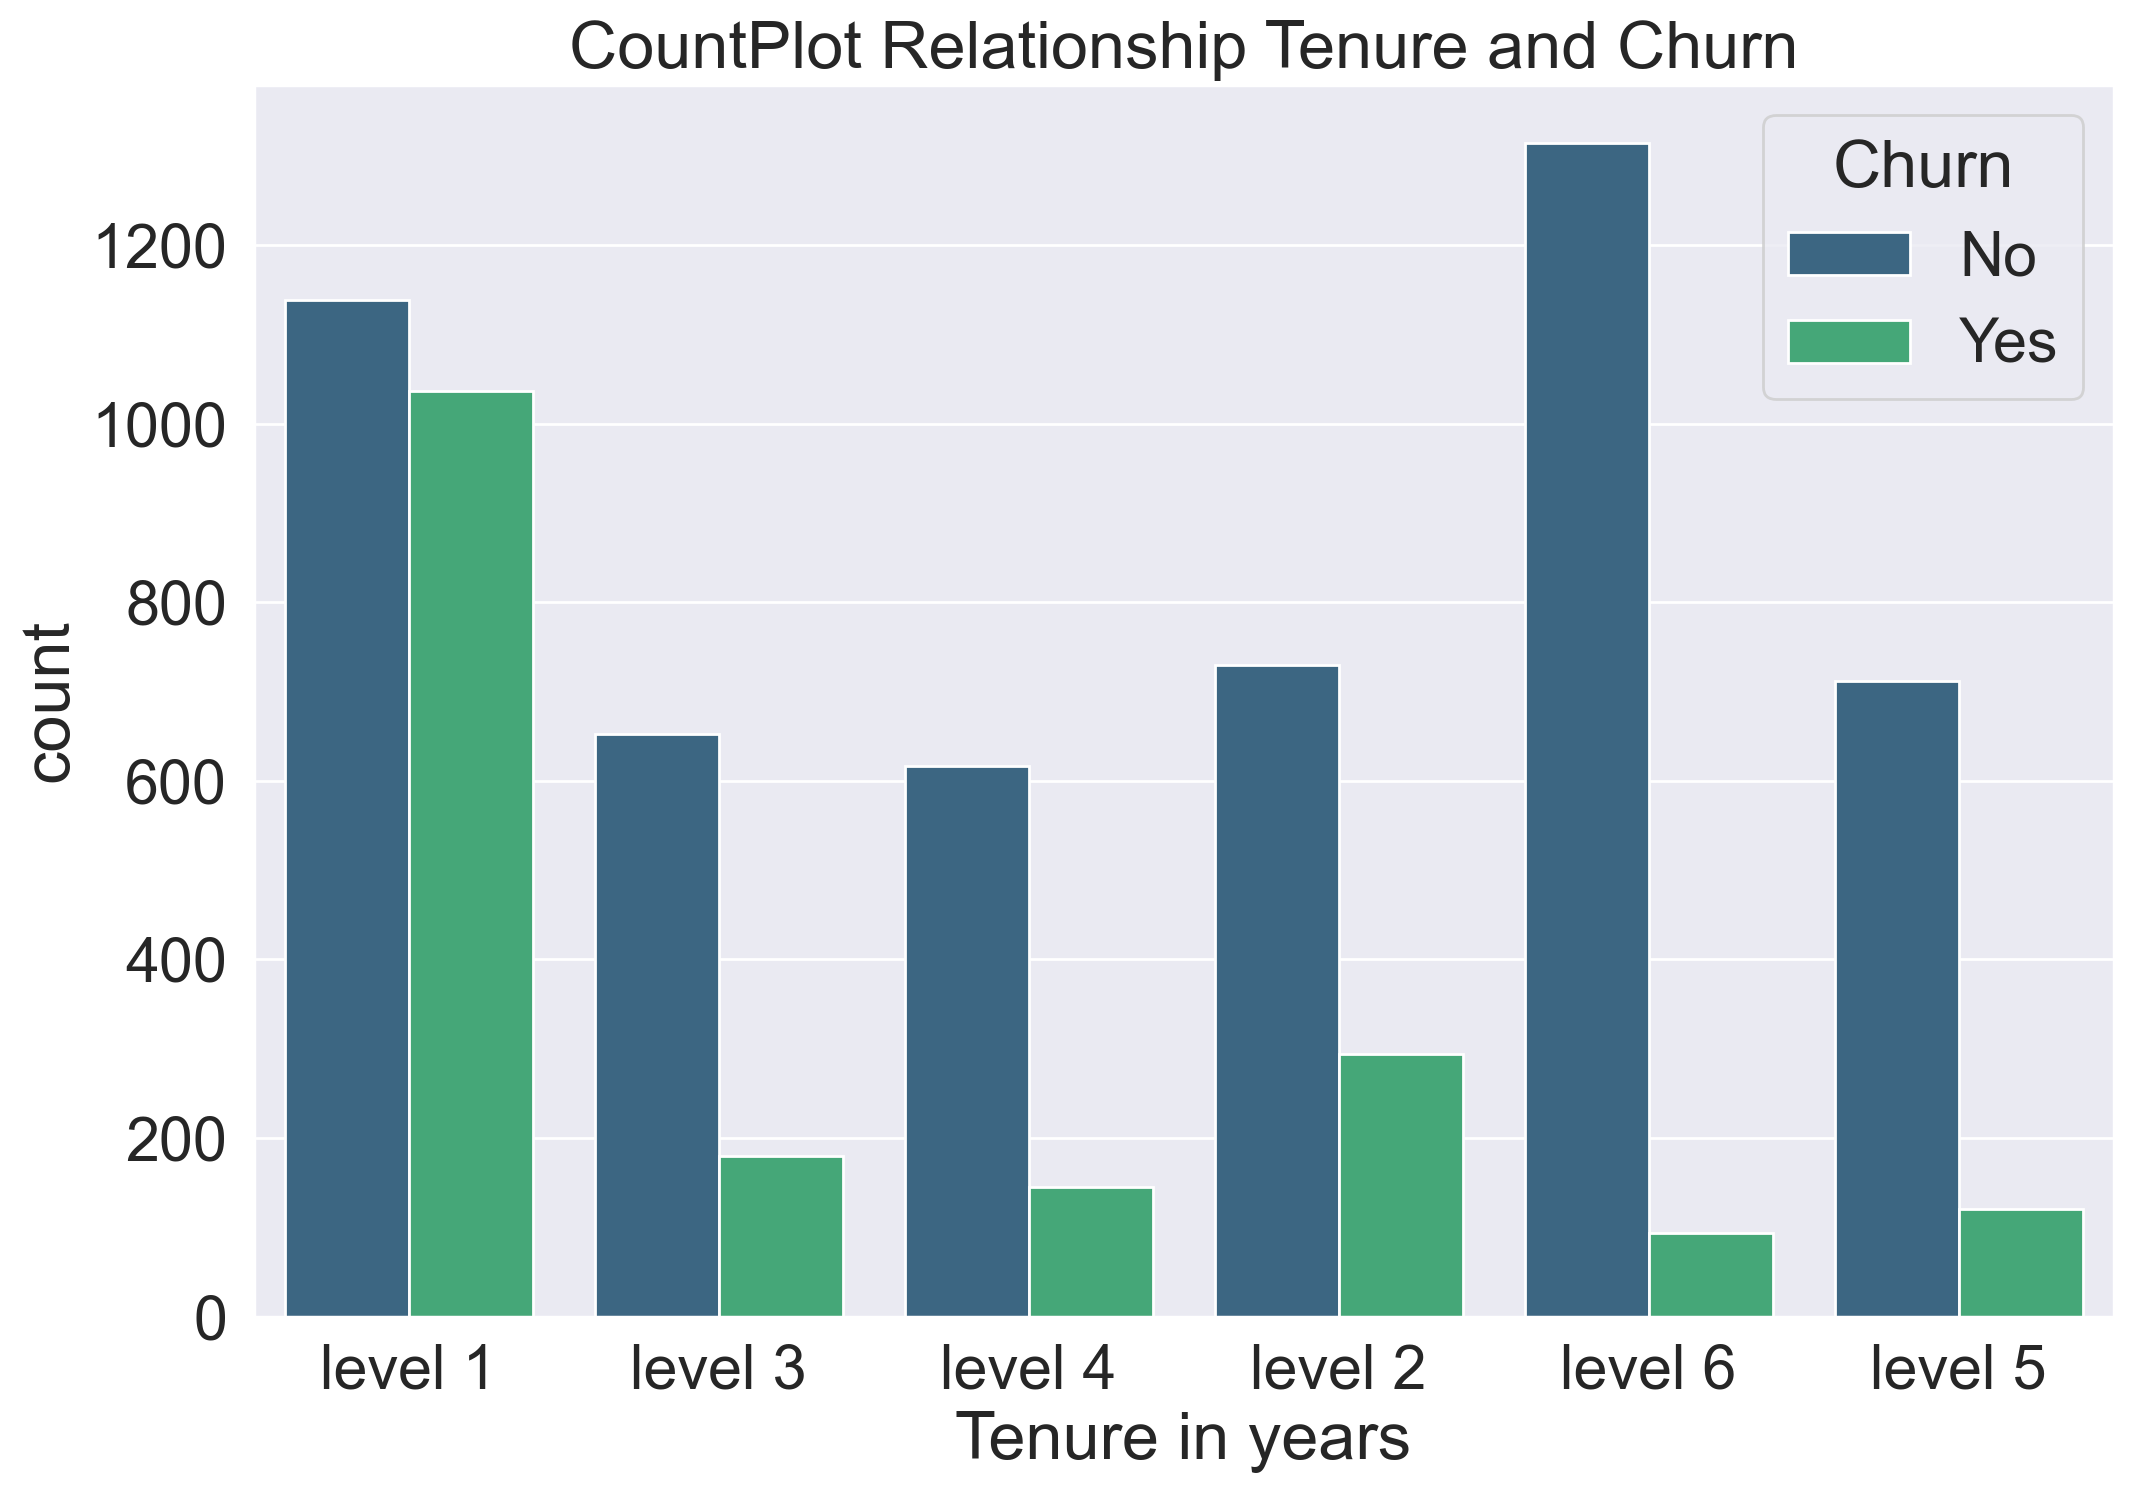

In [29]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='tenure_level',hue='Churn',palette='viridis')
plt.xlabel('Tenure in years')
plt.title("CountPlot Relationship Tenure and Churn")

In [30]:
ordinal_encoder = OrdinalEncoder(categories=[['level 1', 'level 2', 'level 3' ,'level 4','level 5','level 6']])
df['tenure_level'] = ordinal_encoder.fit_transform(df[['tenure_level']])

In [31]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

columns_to_encode = ["gender","SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity","OnlineBackup",
                    "DeviceProtection" ,"TechSupport", "StreamingTV" ,"StreamingMovies" , "Contract" , "PaperlessBilling",
                     "PaymentMethod" , "Churn"
                    ]

# Loop through each column and encode the categorical values
for column in columns_to_encode:
    encoded_values = label_encoder.fit_transform(df[column])
    df[column] = encoded_values

In [32]:
#drop customerID which isnt relevant and monthly charges which were feature engineered to create new features
df.drop(['MonthlyCharges','customerID', 'tenure'],axis=1 , inplace=True)

In [33]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,PlanType,tenure_level
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0,0.0,0.0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1889.50,0,1.0,2.0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,108.15,1,1.0,0.0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1840.75,0,1.0,3.0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,151.65,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1990.50,0,2.0,1.0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,7362.90,0,3.0,5.0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,346.45,0,0.0,0.0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,306.60,1,2.0,0.0


# Modelling

I will be training 4 Different ML models on this Dataset 
1. Tree Based Algorithms 
2. Neural Networks
3. K Nearest Neighbours
4. Bayesian Models 

#### Training/Testing Splits

In [34]:
from sklearn.model_selection import train_test_split
X= df.drop(['Churn'],axis=1)
y= df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Data Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Tree Based Algorithms
I will be investigating the following tree based alagorithms
1. Decision Tree
2. Random Forest
3. Adaptive Boosting


Best parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 5}
Decision Tree: 0.782204 (0.019982)
Best parameters for Random Forest:
{'max_depth': 10, 'n_estimators': 500}
Random Forest: 0.799674 (0.019408)
Best parameters for Adaptive Boosting:
{'learning_rate': 1.0, 'n_estimators': 200}
Adaptive Boosting: 0.804144 (0.016551)


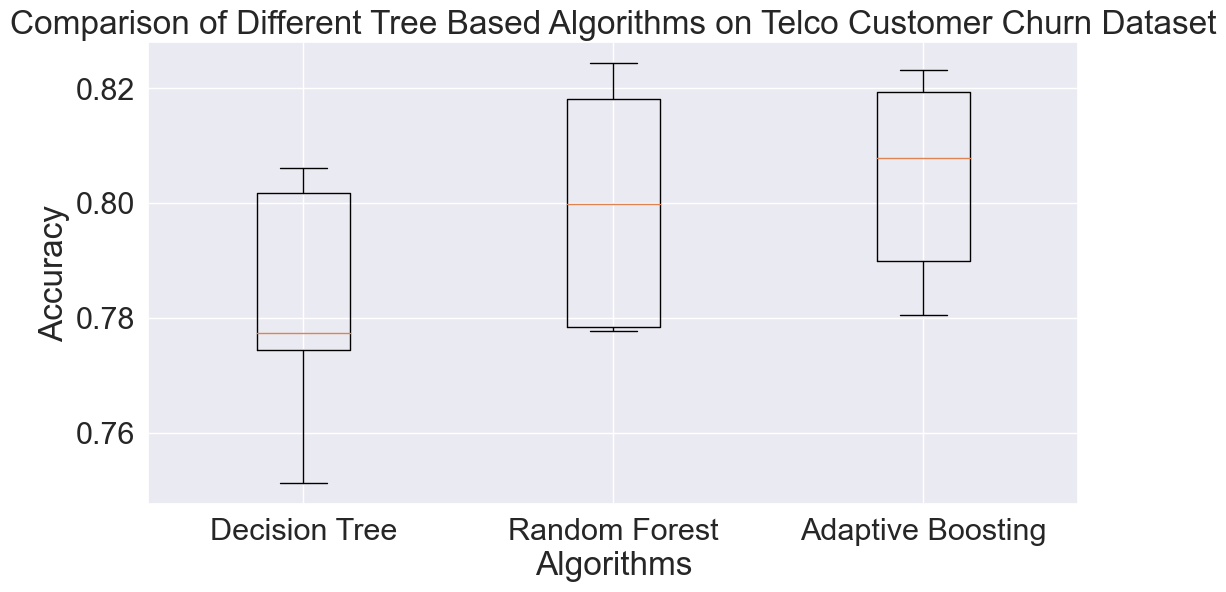

In [36]:
# Define the parameter grids for each algorithm
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10,20]  }
param_grid_rf = {'n_estimators': [100, 200, 300,500], 'max_depth': [None, 5, 10,20] }
param_grid_ab = {'n_estimators': [50, 100, 150,200], 'learning_rate': [0.05 , 0.1, 0.5, 1.0]}
 
# Define the list of models with their respective parameter grids
models = []
models.append(('Decision Tree', DecisionTreeClassifier(), param_grid_dt))
models.append(('Random Forest', RandomForestClassifier(), param_grid_rf))
models.append(('Adaptive Boosting', AdaBoostClassifier(), param_grid_ab))
 
# Perform grid search and evaluate each model in turn
results = []
names = []
best_estimators = []
for name, model, param_grid in models:
    kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
    
    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    best_estimators.append(best_estimator)
    # Print the best parameters
    print(f'Best parameters for {name}:')
    print(grid_search.best_params_)
    
    # Evaluate the best estimator
    cv_results = cross_val_score(best_estimator, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Customized plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as desired
plt.boxplot(results, labels=names)
plt.title('Comparison of Different Tree Based Algorithms on Telco Customer Churn Dataset')  # Customize the title
plt.xlabel('Algorithms')  # Customize the x-axis label
plt.ylabel('Accuracy')  # Customize the y-axis label
plt.show()


Decision tree): ROC AUC=0.820
Random Forest: ROC AUC=0.834
AdaBoost): ROC AUC=0.843


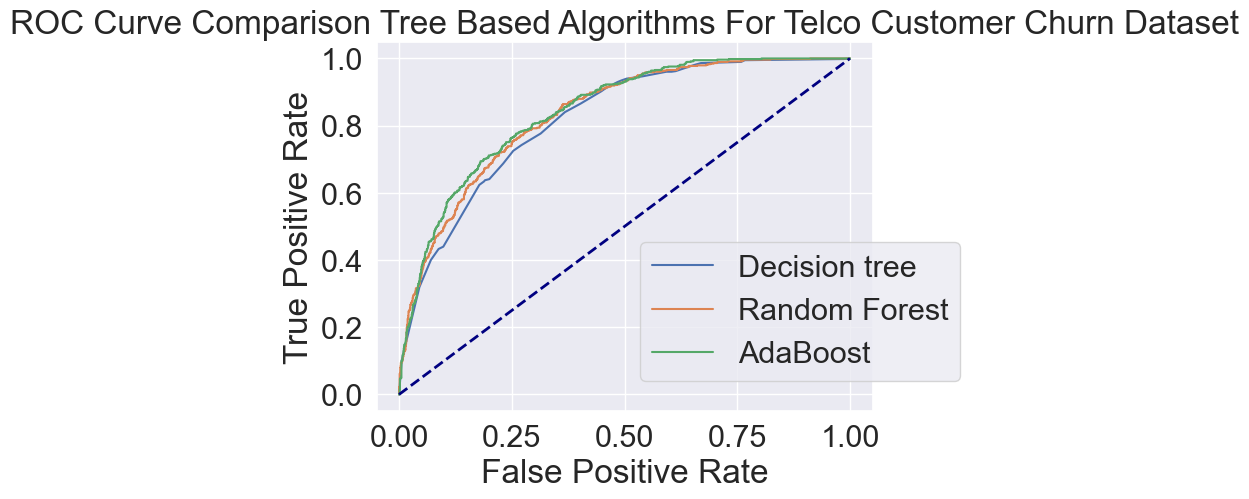

In [38]:
dtree = DecisionTreeClassifier(random_state=100, criterion= 'gini', max_depth = 5 )
dtree.fit(X_train, y_train)
 
# Train random forest classifier
rf = RandomForestClassifier(random_state=100, max_depth = 10, n_estimators =500)
rf.fit(X_train, y_train)
 
ada = AdaBoostClassifier(learning_rate = 1, n_estimators =200)
ada.fit(X_train, y_train)
 


# predict probabilities for different models
lr_probs1 = dtree.predict_proba(X_test)
lr_probs2 = rf.predict_proba(X_test)
lr_probs3 = ada.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]


lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
ada_auc = roc_auc_score(y_test, lr_probs3)

# summarize scores
print('Decision tree): ROC AUC=%.3f' % (lr_auc1))
print('Random Forest: ROC AUC=%.3f' % (lr_auc2))
print('AdaBoost): ROC AUC=%.3f' % (ada_auc))

# calculate roc curves
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
ada_fpr, ada_tpr, _ = roc_curve(y_test, lr_probs3)

# plot the roc curve for the model
plt.plot(lr_fpr1, lr_tpr1, linestyle='-' , label='Decision tree')
plt.plot(lr_fpr2, lr_tpr2,linestyle='-' , label='Random Forest')
plt.plot(ada_fpr, ada_tpr,linestyle='-' , label='AdaBoost')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison Tree Based Algorithms For Telco Customer Churn Dataset')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(bbox_to_anchor=[0.5, 0.5])
# show the plot
plt.show()


## Neural Networks

I will be investigating the following Neural Networks
1. Perceptron
2. Multilayer Perceptron

Best parameters for Perceptron:
{'eta0': 0.1, 'max_iter': 100}
Perceptron: 0.733648 (0.028752)
Best parameters for MLP:
{'hidden_layer_sizes': (10,), 'max_iter': 500, 'solver': 'adam'}
MLP: 0.796827 (0.021073)


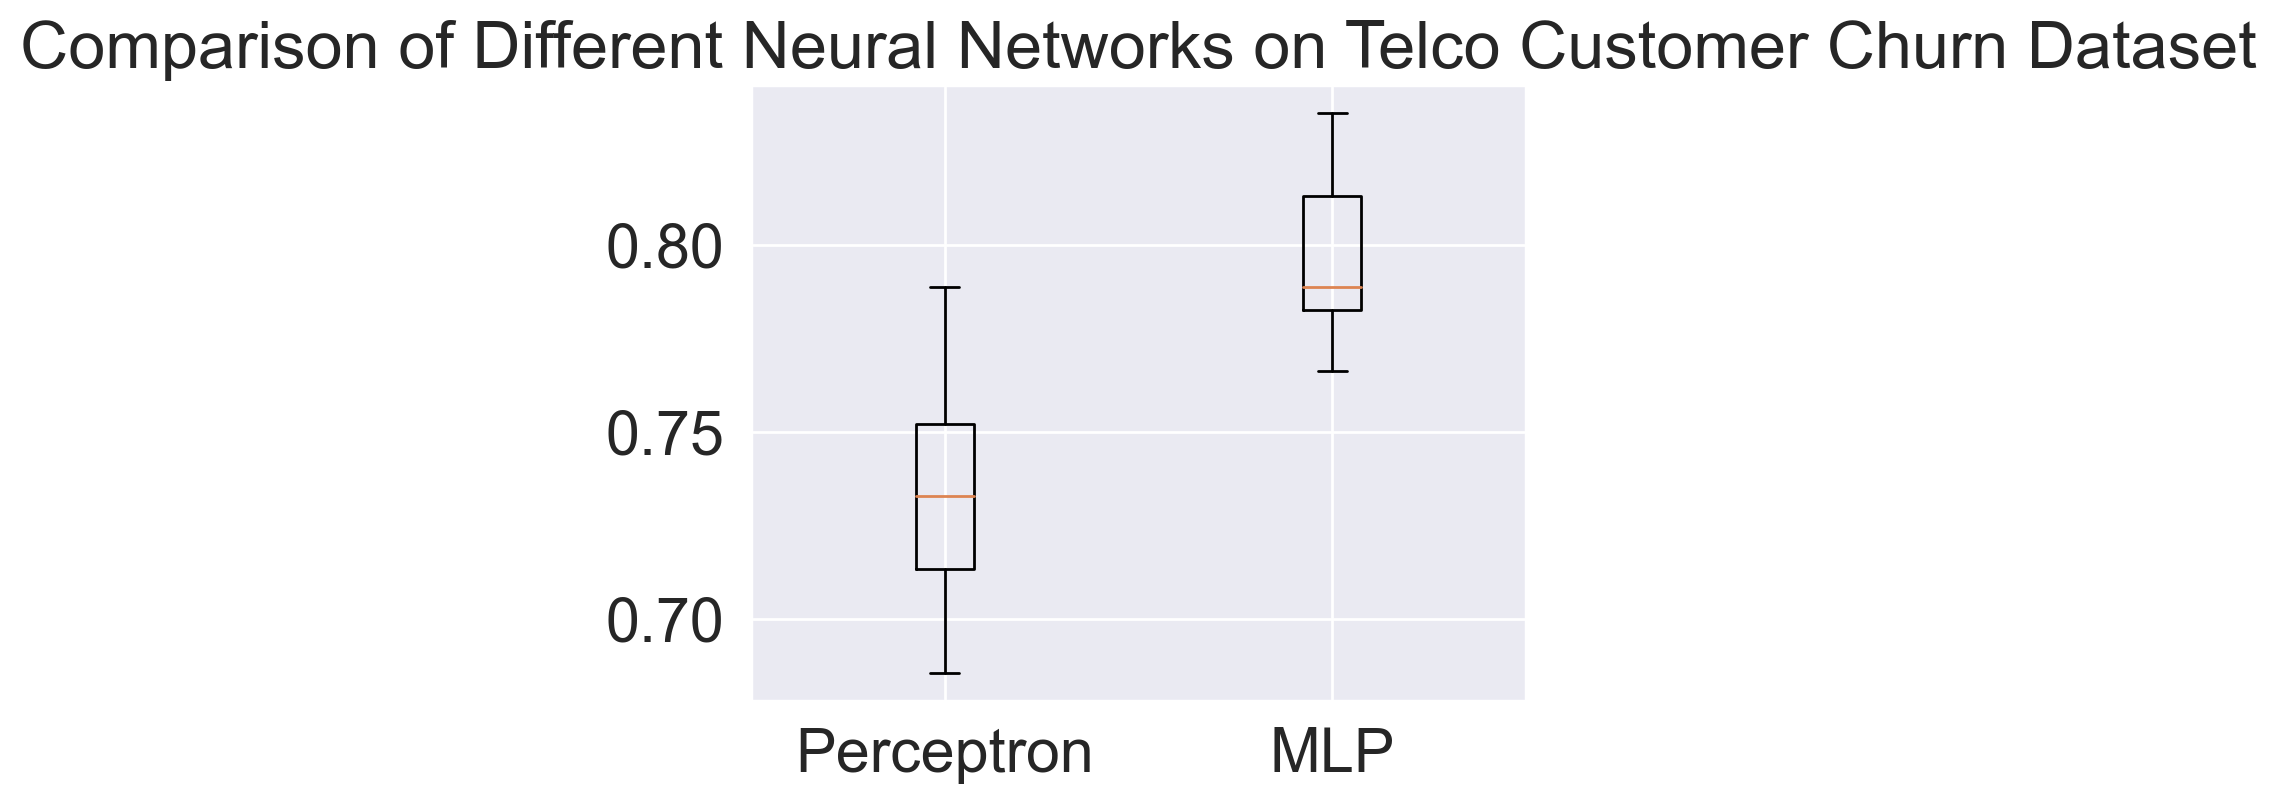

In [39]:

# Define the parameter grids for each algorithm
param_grid_perceptron = {
                         'max_iter': [100 , 250 , 500,1000],  # Test different values for max_iter
    'eta0': [0.05 ,0.1, 0.01, 0.001] }
param_grid_mlp = {'hidden_layer_sizes': [(10,), (20,), (10, 10)],
                  'max_iter': [500 , 1000, 1500,2000] , 'solver' : ['lbfgs', 'sgd', 'adam']}

# Define the list of models with their respective parameter grids
models = []
models.append(('Perceptron', Perceptron(random_state=100), param_grid_perceptron))
models.append(('MLP', MLPClassifier(random_state=100), param_grid_mlp))

# Perform grid search and evaluate each model in turn
results = []
names = []
best_estimators = []
for name, model, param_grid in models:
    kfold = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)

    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid_search.fit(scaled_X_train, y_train)
    best_estimator = grid_search.best_estimator_
    best_estimators.append(best_estimator)

    # Print the best parameters
    print(f'Best parameters for {name}:')
    print(grid_search.best_params_)

    # Evaluate the best estimator
    cv_results = cross_val_score(best_estimator,scaled_X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.figure(figsize=(5,4),dpi=200)
plt.boxplot(results, labels=names)
plt.title('Comparison of Different Neural Networks on Telco Customer Churn Dataset')
plt.show()



MLP: ROC AUC=0.823
Perceptron): ROC AUC=0.797


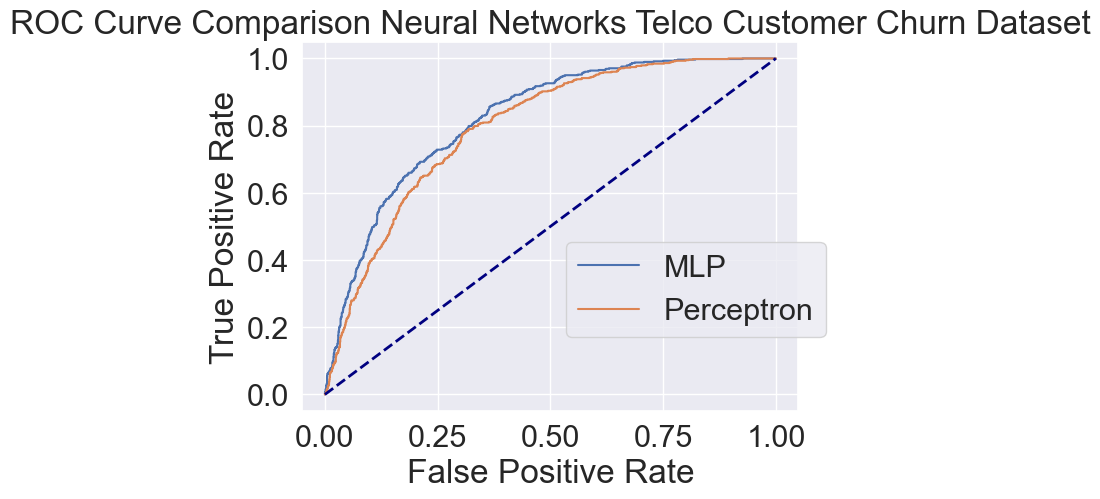

In [40]:
clf1 = MLPClassifier(random_state=100, hidden_layer_sizes=(10,), max_iter=500 , solver = 'adam' )
clf1.fit(X_train, y_train)


Ptron = Perceptron(eta0=0.1, random_state=100, max_iter=100)
clf2 = CalibratedClassifierCV(Ptron)
clf2.fit(scaled_X_train, y_train)



# predict probabilities for different models
lr_probs1 = clf1.predict_proba(X_test)
lr_probs2 = clf2.predict_proba(scaled_X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]



# calculate accuracy score different models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)

# summarize scores
print('MLP: ROC AUC=%.3f' % (lr_auc1))
print('Perceptron): ROC AUC=%.3f' % (lr_auc2))

# calculate roc curves

lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)

# plot the roc curve for the model
plt.plot(lr_fpr1, lr_tpr1, linestyle='-' , label='MLP')
plt.plot(lr_fpr2, lr_tpr2,linestyle='-' , label='Perceptron')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison Neural Networks Telco Customer Churn Dataset')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(bbox_to_anchor=[0.5, 0.5])
# show the plot
plt.show()


## K NEAREST NEIGHBORS

In [41]:
knn_model = KNeighborsClassifier()

In [42]:
param_grid= {'n_neighbors':range(1,50), 'metric': ['minkowski','manhattan','euclidean']}
knn_grid_model = GridSearchCV(knn_model,param_grid)
knn_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)})

In [43]:
print(knn_grid_model.best_params_)


{'metric': 'manhattan', 'n_neighbors': 40}


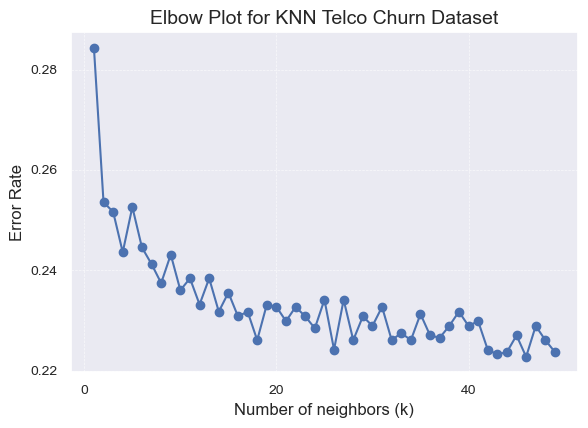

In [44]:
# Calculate error rate for different k values
k_values = range(1, 50)
error_rates = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(scaled_X_train, y_train)
    y_pred = knn.predict(scaled_X_test)
    error_rate = 1 - knn.score(scaled_X_test, y_test)  # Calculate error rate as 1 - accuracy
    error_rates.append(error_rate)

# Plot the error rate curve
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='b')
plt.xlabel('Number of neighbors (k)', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Elbow Plot for KNN Telco Churn Dataset', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

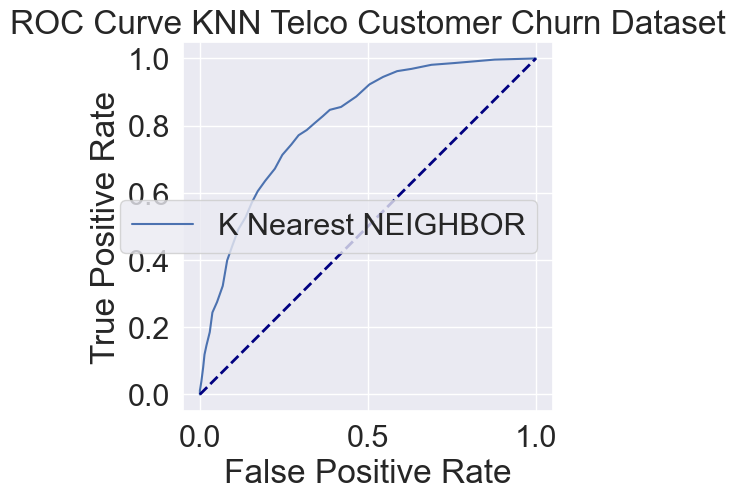

In [45]:
knn_probs = knn_grid_model.predict_proba(scaled_X_test)

# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# calculate knn auc
knn_auc = roc_auc_score(y_test, knn_probs)
 # Calculate the ROC curves
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
 
# Plot the ROC curves with custom styling and thinner lines
plt.plot(knn_fpr, knn_tpr, label='K Nearest NEIGHBOR')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Show the legend
plt.legend()
plt.title('ROC Curve KNN Telco Customer Churn Dataset')
# Show the plot
plt.show()

## Bayesian Learning

I will be investigating the following bayesian learning models  
1. Guassian Naive Bayes
2. Multinomial Naive Bayes
 

Guassian NB: 0.756804 (0.023202)
Multinomial NB: 0.702146 (0.018407)


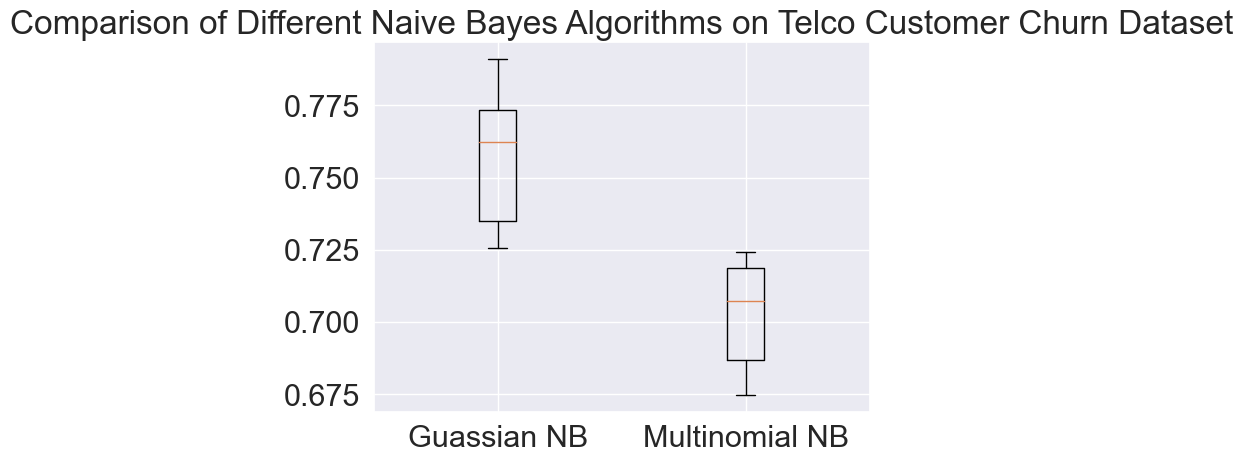

In [46]:
# apppend models
models = []
models.append(('Guassian NB', GaussianNB()))
models.append(('Multinomial NB', MultinomialNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=100 , shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Comparison of Different Naive Bayes Algorithms on Telco Customer Churn Dataset')
plt.show()

GNB: ROC AUC=0.810
MNB): ROC AUC=0.775


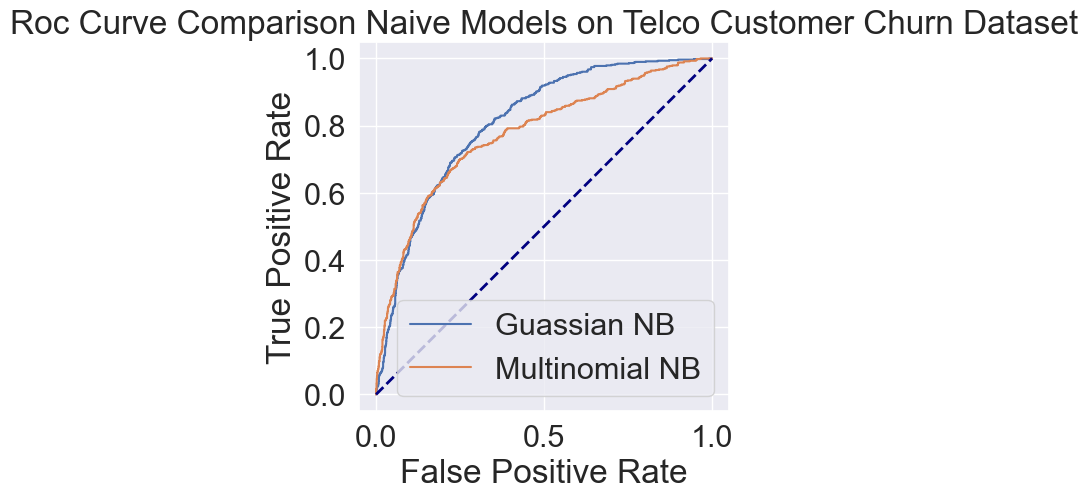

In [47]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

gnb_probs = gnb.predict_proba(X_test)
mnb_probs = mnb.predict_proba(X_test)

# keep probabilities for the positive outcome only
gnb_probs = gnb_probs[:, 1]
mnb_probs = mnb_probs[:, 1]

# calculate accuracy score different naive models
gnb_auc = roc_auc_score(y_test, gnb_probs)
mnb_auc = roc_auc_score(y_test, mnb_probs)
 
 # Calculate the ROC curves
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
mnb_fpr, mnb_tpr, _ = roc_curve(y_test, mnb_probs)
# summarize scores
print('GNB: ROC AUC=%.3f' % (gnb_auc))
print('MNB): ROC AUC=%.3f' % (mnb_auc))
# Plot the ROC curves with custom styling and thinner lines
plt.plot(gnb_fpr, gnb_tpr, label='Guassian NB')
plt.plot(mnb_fpr, mnb_tpr,  label='Multinomial NB')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve Comparison Naive Models on Telco Customer Churn Dataset')
# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Final Evaluation

GNB): ROC AUC=0.810
KNN): ROC AUC=0.812
MLP: ROC AUC=0.797
AdaBoost): ROC AUC=0.843


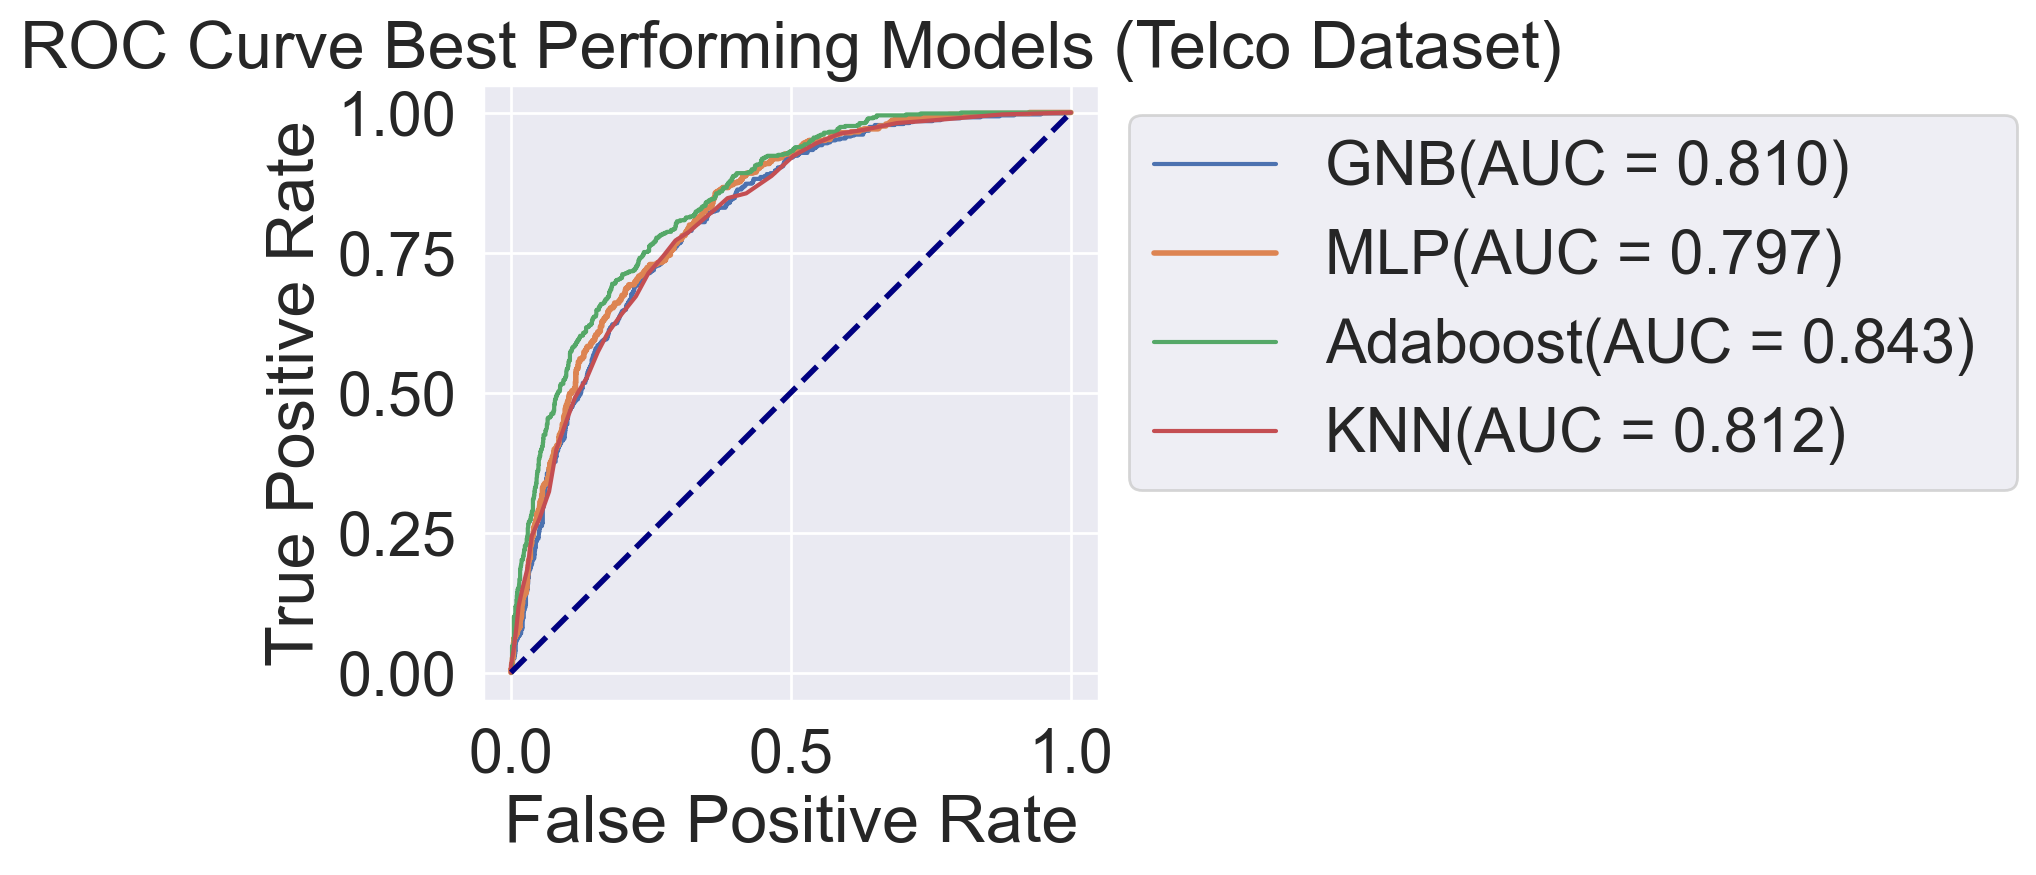

In [56]:
print('GNB): ROC AUC=%.3f' % (gnb_auc))
print('KNN): ROC AUC=%.3f' % (knn_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc2))
print('AdaBoost): ROC AUC=%.3f' % (ada_auc))

# Plot the ROC curves with custom styling and thinner lines
plt.figure(figsize=(5,4),dpi=200)
plt.plot(gnb_fpr, gnb_tpr, label='GNB(AUC = %0.3f) '% gnb_auc)
plt.plot(lr_fpr1, lr_tpr1, linewidth=2, label='MLP(AUC = %0.3f) '% lr_auc2)
plt.plot(ada_fpr, ada_tpr,  label='Adaboost(AUC = %0.3f) '% ada_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN(AUC = %0.3f) '% knn_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
 
# Axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Best Performing Models (Telco Dataset)')
# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Show the legend
plt.legend(bbox_to_anchor=[1, 1])

# Show the plot
plt.show()

In [49]:
##Classification Report Best Model
ada_preds = ada.predict(X_test)
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1528
           1       0.67      0.55      0.60       582

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.74      2110
weighted avg       0.79      0.80      0.79      2110



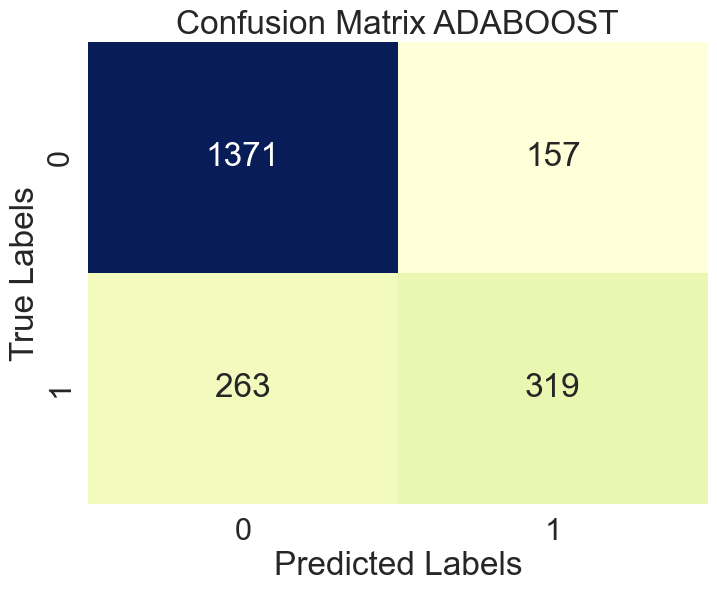

In [50]:
##Confusion matrix Best Model
cm = confusion_matrix(y_test,ada_preds)
# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Confusion Matrix ADABOOST')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()